# Re-plotting graphs using updated format
- For the most part, takes code from chpt_11 and chpt_12 notebooks and reformats. 
- Some new graphs included.

# Chapter 11 (old chapter 12)

In [15]:
import pyam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sns
import matplotlib.colors
from matplotlib.lines import Line2D


sns.set_theme(style="whitegrid")
results_path = '../../../data/TOD/model_results/to_share/model_results_to_share_Outlooks.xlsx'
ar6_meta_path = '../../../data/TOD/model_results/raw/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx'
other_results_path = '../../../data/TOD/model_results/to_share/model_results_to_share.xlsx'

ar6_meta = pd.read_excel(ar6_meta_path, sheet_name='meta_Ch3vetted_withclimate')
ar6_c1_scenarios = ar6_meta[ar6_meta['Subset_Ch4'] == 'Limit to 1.5C (>50%) no or low OS immediate 2020 action']['Scenario'].unique()
ar6_c78_scenarios = ar6_meta[ar6_meta['Subset_Ch4'] == 'Trend from implemented policies']['Scenario'].unique()

In [16]:
scenario_rename_dict = {
    "REF": "Current Trends",
    "LIFE-TP": "Behaviour-focused",
    "TECH-TP": "Technology-focused",
    "REF-v2": "Current Trends",
    "LIFE-TP-v2": "Behaviour-focused",
    "TECH-TP-v2": "Technology-focused",
}

In [17]:
df_stacked_geo = pd.read_excel(results_path)
df_stacked_geo.rename(columns={'topic':'model'}, inplace=True)
df_stacked_geo = pyam.IamDataFrame(df_stacked_geo)
df_energy_geo= df_stacked_geo.filter(variable=[
            'Primary Energy|Biomass|w/ CCS',
            'Primary Energy|Biomass|w/o CCS',
            'Primary Energy|Coal|w/ CCS',
            'Primary Energy|Coal|w/o CCS',
            'Primary Energy|Gas|w/ CCS',
            'Primary Energy|Gas|w/o CCS',
            'Primary Energy|Nuclear',
            'Primary Energy|Oil|w/ CCS',
            'Primary Energy|Oil|w/o CCS',
            'Primary Energy|Non-Biomass Renewables',
            'Secondary Energy|Electricity|Biomass',
            'Secondary Energy|Electricity|Coal',
            'Secondary Energy|Electricity|Gas',
            'Secondary Energy|Electricity|Non-Biomass Renewables',
            'Secondary Energy|Electricity|Nuclear',
            'Secondary Energy|Electricity|Oil',],
    region='World',
    scenario=['TECH-TP', 'LIFE-TP'], 
    year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])

df_energy_geo.rename(scenario=scenario_rename_dict, inplace=True)

df_total_energy = df_stacked_geo.filter(variable=['Primary Energy', 'Secondary Energy|Electricity'],
                                         year=[2020, 2025, 2030, 2035, 2040, 2045, 2050],
                                         scenario='REF',
                                         region='World')
df_total_energy.rename(scenario=scenario_rename_dict, inplace=True)

df_ar6_energy_c1 = pyam.read_iiasa(
    'ar6-public',
    variable=[
            'Primary Energy', 'Secondary Energy|Electricity', 'Emissions|CO2' 
            ],
    region='World',
    scenario=list(ar6_c1_scenarios),  
)

df_ar6_energy_c1 = df_ar6_energy_c1.filter(year=[2030, 2050])

df_ar6_energy_c1_data_electricity = df_ar6_energy_c1.filter(variable='Secondary Energy|Electricity').data
df_ar6_energy_c1_data_emissions = df_ar6_energy_c1.filter(variable='Emissions|CO2').data

min_values_c1_electricity = df_ar6_energy_c1_data_electricity.groupby('year')['value'].min()
max_values_c1_elecrtricity = df_ar6_energy_c1_data_electricity.groupby('year')['value'].max()

min_values_c1_emissions = df_ar6_energy_c1_data_emissions.groupby('year')['value'].min()
max_values_c1_emissions = df_ar6_energy_c1_data_emissions.groupby('year')['value'].max()


[INFO] 09:38:14 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 09:38:14 - pyam.iiasa: You are connected as user `stephenmaycock`


In [18]:
df_aim_image = pd.read_excel(results_path)
df_aim_image.rename(columns={'topic':'model'}, inplace=True)
df_aim_image = pyam.IamDataFrame(df_aim_image)
df_aim_image= df_aim_image.filter(variable=[
                    'Primary Energy',
                    'Primary Energy|Non-Biomass Renewables',
                    'Primary Energy|Biomass',
                    'Primary Energy|*|w/ CCS',
                    'Final Energy',
                    'Final Energy|Electricity',
                    'Emissions|CO2',
                    # 'Emissions|CO2|*',
                    'Emissions|CO2|Energy',
                    'Emissions|CO2|AFOLU',
                    'Emissions|N2O',
                    'Emissions|CH4',
                    'Emissions|Kyoto Gases',
                    'Land Cover|Cropland', 
                    'Land Cover|Pasture',
                    'Land Cover|Other',
                    'Land Cover|Forest and Other Natural Land',
                    'Carbon Sequestration|CCS',
                    'Carbon Sequestration|CCS|Biomass',
                    'Carbon Sequestration|CCS|Fossil',
                    'Food Demand|Crops',
                    'Food Demand|Livestock',
                    'Agricultural Production|Non-Energy|Crops', 
                    'Agricultural Production|Non-Energy|Livestock',
                    'Yield|Cereal',],
                    region='World')

df_aim_image = df_aim_image.filter(year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])

In [19]:
df_GTEM_image = pd.read_excel(other_results_path)
df_GTEM_image.rename(columns={'topic':'model'}, inplace=True)
print(df_GTEM_image)
df_GTEM_image = pyam.IamDataFrame(df_GTEM_image)
df_GTEM_image= df_GTEM_image.filter(variable=[
                    'Material Demand|Aluminium',
                    'Material Demand|Copper',
                    'Material Demand|Industrial Sand and Gravel',
                    'Material Demand|Iron Ore',
                    'Material Demand|Other Materials',
                    'Material Demand|Other Metals and Concentrates',
                    'Material Demand|Other Non-Metallic Minerals',
                    'Material Demand|Sand Gravel and Rock for Construction',
                    'Material Demand|Total',
                    'Material Demand|Wild Catch Fish',
                    'DE|Biomass',
                    'DE|Fossil Fuel',
                    'DE|Metal Ores',
                    'DE|Non-metallic Minerals',
                    'DE|Total per capita',
                    'GDP',
                    'Resource Productivity',
                    'DE|Biomass Difference',
                    'DE|Fossil Fuel Difference',
                    'DE|Metal Ores Difference',
                    'DE|Non-metallic Minerals Difference'
                    ],
                    region='World',
                    year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])
df_GTEM_image.rename(scenario=scenario_rename_dict, inplace=True)
print(df_GTEM_image)


              model scenario                        region  \
0     Air_Pollution  LIFE-TP                Africa (UN-R5)   
1     Air_Pollution  LIFE-TP                Africa (UN-R5)   
2     Air_Pollution  LIFE-TP                Africa (UN-R5)   
3     Air_Pollution  LIFE-TP                Africa (UN-R5)   
4     Air_Pollution  LIFE-TP  Asia and the Pacific (UN-R5)   
...             ...      ...                           ...   
4062          Water  TECH-TP                         World   
4063          Water  TECH-TP                         World   
4064          Water  TECH-TP                         World   
4065          Water  TECH-TP                         World   
4066          Water  TECH-TP                         World   

                                             variable    unit  2000    2010  \
0                                   Concentration|NOx   µg/m3   NaN     NaN   
1                                 Concentration|Ozone     ppb   NaN     NaN   
2                 

In [20]:
df_FASST_image = pd.read_excel(results_path)
df_FASST_image.rename(columns={'topic':'model'}, inplace=True)
df_FASST_image = pyam.IamDataFrame(df_FASST_image)
df_FASST_image.rename(scenario=scenario_rename_dict, inplace=True)
df_FASST_image= df_FASST_image.filter(variable=[
                    'Concentration|Ozone',
                    'Concentration|PM2.5'
                    ],
                    region='World')

df_FASST_image = df_FASST_image.filter(year=[2020, 2030, 2040, 2050])

In [21]:
df_MSA_image = pd.read_excel(results_path)
df_MSA_image.rename(columns={'topic':'model'}, inplace=True)
df_MSA_image = pyam.IamDataFrame(df_MSA_image)
df_MSA_image.rename(scenario=scenario_rename_dict, inplace=True)
df_MSA_image= df_MSA_image.filter(variable=[
                    'Terrestrial Biodiversity|MSA'],
                    region='World')
df_MSA_image = df_MSA_image.filter(year=[2015, 2020, 2030, 2040, 2050])

df_MSA_loss = pd.read_excel(r'Z:\users\maycocks\GEO7\additional_figure_data\11.20b.xlsx')
df_MSA_loss.rename(columns={'topic':'model'}, inplace=True)
df_MSA_loss = pyam.IamDataFrame(df_MSA_loss)
df_MSA_loss.rename(scenario=scenario_rename_dict, inplace=True)
df_MSA_image = df_MSA_image.append(df_MSA_loss)
print(df_MSA_image)




<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Biodiversity (1)
 * scenario : Behaviour-focused, Current Trends, Technology-focused (3)
Timeseries data coordinates:
   region   : World (1)
   variable : Terrestrial Biodiversity|MSA, ... (4)
   unit     : % (1)
   year     : 2020, 2030, 2050 (3)


In [22]:
df_water_image = pd.read_excel(results_path)
df_water_image.rename(columns={'topic':'model'}, inplace=True)
df_water_image = pyam.IamDataFrame(df_water_image)
df_water_image.rename(scenario=scenario_rename_dict, inplace=True)
df_water_image= df_water_image.filter(variable=[
                    'Water Quality|Nitrogen|Delivery|Agriculture',
                    'Water Quality|Nitrogen|Delivery|Aquaculture',
                    'Water Quality|Nitrogen|Delivery|Natural',
                    'Water Quality|Nitrogen|Delivery|Pointsources',
                    'Water Quality|Phosphorus|Delivery|Agriculture',
                    'Water Quality|Phosphorus|Delivery|Aquaculture',
                    'Water Quality|Phosphorus|Delivery|Natural',
                    'Water Quality|Phosphorus|Delivery|Pointsources',
                    
                    ],
                    region='World')
df_water_image = df_water_image.filter(year=[2015, 2020, 2030, 2040, 2050])

In [23]:
df_emissions_co2_geo = pd.read_excel(results_path)
df_emissions_co2_geo.rename(columns={'topic':'model'}, inplace=True)
df_emissions_co2_geo = pyam.IamDataFrame(df_aim_image)
df_emissions_co2_geo= df_emissions_co2_geo.filter(variable=['Emissions|CO2|AFOLU','Emissions|CO2|Energy',],
                                region='World')

df_emissions_co2_geo = df_emissions_co2_geo.filter(year=[2020, 2025, 2030, 2035, 2040, 2045, 2050])
df_emissions_co2_geo.multiply('Emissions|CO2|AFOLU', 1, 'Emissions|CO2|Land Use', ignore_units='Mt CO2/yr', append=True)
df_emissions_co2_geo = df_emissions_co2_geo.filter(year=[2010, 2015, 2020, 2025, 2030, 2035, 2040, 2045, 2050])
df_emissions_co2_geo.rename(scenario=scenario_rename_dict, inplace=True)
df_emissions_co2_geo.timeseries()

2020  \
model     scenario           region variable               unit                 
Emissions Behaviour-focused  World  Emissions|CO2|AFOLU    Mt CO2/yr   3500.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  34800.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   3500.0   
          Current Trends     World  Emissions|CO2|AFOLU    Mt CO2/yr   3500.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  34800.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   3500.0   
          Technology-focused World  Emissions|CO2|AFOLU    Mt CO2/yr   3500.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  34800.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   3500.0   

                                                                         2030  \
model     scenario           region variable               unit                 
Emissions Behaviour-focused  World  Emissions|CO2|AFOLU    Mt CO2/yr    789.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  17800.0   
                                    Emissions|CO2|Land Use Mt CO2/yr    789.0   
          Current Trends     World  Emissions|CO2|AFOLU    Mt CO2/yr   3560.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  44700.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   3560.0   
          Technology-focused World  Emissions|CO2|AFOLU    Mt CO2/yr    940.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  20600.0   
                                    Emissions|CO2|Land Use Mt CO2/yr    940.0   

                                                                         2040  \
model     scenario           region variable               unit                 
Emissions Behaviour-focused  World  Emissions|CO2|AFOLU    Mt CO2/yr  -2260.0   
                                    Emissions|CO2|Energy   Mt CO2/yr   5370.0   
                                    Emissions|CO2|Land Use Mt CO2/yr  -2260.0   
          Current Trends     World  Emissions|CO2|AFOLU    Mt CO2/yr   2760.0   
                                    Emissions|CO2|Energy   Mt CO2/yr  49100.0   
                                    Emissions|CO2|Land Use Mt CO2/yr   2760.0   
          Technology-focused World  Emissions|CO2|AFOLU    Mt CO2/yr  -2700.0   
                                    Emissions|CO2|Energy   Mt CO2/yr   7210.0   
                                    Emissions|CO2|Land Use Mt CO2/yr  -2700.0   

                                                                         2050  
model     scenario           region variable               unit                
Emissions Behaviour-focused  World  Emissions|CO2|AFOLU    Mt CO2/yr  -4110.0  
                                    Emissions|CO2|Energy   Mt CO2/yr    157.0  
                                    Emissions|CO2|Land Use Mt CO2/yr  -4110.0  
          Current Trends     World  Emissions|CO2|AFOLU    Mt CO2/yr   2080.0  
                                    Emissions|CO2|Energy   Mt CO2/yr  51000.0  
                                    Emissions|CO2|Land Use Mt CO2/yr   2080.0  
          Technology-focused World  Emissions|CO2|AFOLU    Mt CO2/yr  -4200.0  
                                    Emissions|CO2|Energy   Mt CO2/yr   1000.0  
                                    Emissions|CO2|Land Use Mt CO2/yr  -4200.0

In [24]:
df_IFs = pd.read_excel(results_path)
df_IFs.rename(columns={'topic':'model'}, inplace=True)
df_IFs = pyam.IamDataFrame(df_IFs)
df_IFs.rename(scenario=scenario_rename_dict, inplace=True)
df_IFs_woman = df_IFs.filter(variable=['Women Excess Men Poverty'],
                             year=[2020,2030,2040,2050])
print(df_IFs_woman)
df_IFs= df_IFs.filter(variable=['State Failure|Civil War',
                                'Population|Malnourished',
                                'Population|Poverty Under $2.15',
                                'Traditional Cookstoves',
                                'Unimproved Water',
                                'DALYs',
                                'Health|Deaths|Communicable (Difference Relative to REF)',
                                'Health|Deaths|Injuries (Difference Relative to REF)',
                                'Health|Deaths|Non-Communicable (Difference Relative to REF)',
                                ],
                                region='World')


df_IFs = df_IFs.filter(year=[2020, 2030, 2040, 2050])



<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Socio_Economics (1)
 * scenario : Behaviour-focused, Current Trends, Technology-focused (3)
Timeseries data coordinates:
   region   : Africa (UN-R5), Asia and the Pacific (UN-R5), ... Western Europe and Other States (UN-R5) (5)
   variable : Women Excess Men Poverty (1)
   unit     : millions (1)
   year     : 2020, 2030, 2040, 2050 (4)


In [25]:
df_ar6 = pyam.read_iiasa(
    'ar6-public',
    variable=[
            'Primary Energy',
            'Primary Energy|Non-Biomass Renewables',
            'Primary Energy|Biomass',
            'Primary Energy|Biomass|Electricity|w/ CCS',
            'Primary Energy|Biomass|Modern|w/ CCS',
            'Primary Energy|Coal|w/ CCS',
            'Primary Energy|Gas|w/ CCS',
            'Primary Energy|Oil|w/ CCS',
            'Final Energy',
            'Final Energy|Electricity',
            'Emissions|CO2',
            'Emissions|CO2|Energy',
            'Emissions|CO2|AFOLU',
            'Emissions|Kyoto*',
            'Emissions|N2O',
            'Emissions|CH4',
            'Land Cover|Cropland', 
            'Land Cover|Pasture',
            'Land Cover|Forest',
            'Land Cover|Other Natural Land',
            'Land Cover|Built-up Area',
            'Land Cover|Other Land',
            'Land Cover|Other Arable Land',
            'Carbon Sequestration|CCS',
            'Carbon Sequestration|CCS|Biomass',
            'Carbon Sequestration|CCS|Fossil',
            'Food Demand|Crops',
            'Food Demand|Livestock',
            'Agricultural Production|Non-Energy|Crops', 
            'Agricultural Production|Non-Energy|Livestock',
            'Yield|Cereal' 
            ],
    region='World',
    scenario=list(ar6_c1_scenarios),  
)

df_ar6.validate(
    variable='Food Demand*', year=2020, upper_bound=5000, exclude_on_fail=True
)

df_ar6 = df_ar6.filter(year=[2030, 2050], exclude=False)
df_ar6 = df_ar6.rename(variable={'Primary Energy|Biomass|Modern|w/ CCS':'Primary Energy|Biomass|w/ CCS',
                                                    #  'Land Cover|Other Land':'Land Cover|Other Natural Land'
                                                     })
df_ar6.aggregate('Land Cover|Other Natural Land', ['Land Cover|Other Land','Land Cover|Other Arable Land'], append=True)
df_ar6.aggregate('Land Cover|Forest and Other Natural Land', ['Land Cover|Forest','Land Cover|Other Natural Land'], append=True)
df_ar6.aggregate('Land Cover|Other', ['Land Cover|Built-up Area'], append=True)
df_ar6.variable

df_aim_image.rename(scenario=scenario_rename_dict, inplace=True)
df_marker = df_aim_image.data
df_marker_data = df_marker.copy()
df_ar6_data = df_ar6.data
df_marker_data

variables = df_marker_data.variable.unique()
for variable in variables:
    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable] # Seems like an error in re-initializing variable but straight from Laszlo
# Calculate min and max across models for each year
min_values = ar6_data.groupby('year')['value'].min()
max_values = ar6_data.groupby('year')['value'].max()

df_ar6_co2_emissions_c1 = df_ar6.filter(variable=['Emissions|CO2'])
df_ar6_co2_emissions_c1 = df_ar6_co2_emissions_c1.data

df_ar6_co2_emissions_c78 = pyam.read_iiasa(
    'ar6-public',
    variable=[
            'Emissions|CO2',
            ],
    region='World',
    scenario=list(ar6_c78_scenarios),  
)

df_ar6_co2_emissions_c78 = df_ar6_co2_emissions_c78.filter(year=[2030, 2050])
df_ar6_co2_emissions_c78 = df_ar6_co2_emissions_c78.data

# Get min and max values for uncertainty range ipcc
min_values_c1 = df_ar6_co2_emissions_c1.groupby('year')['value'].min()
max_values_c1 = df_ar6_co2_emissions_c1.groupby('year')['value'].max()

min_values_c78 = df_ar6_co2_emissions_c78.groupby('year')['value'].min()
max_values_c78 = df_ar6_co2_emissions_c78.groupby('year')['value'].max()

[INFO] 09:38:32 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 09:38:32 - pyam.iiasa: You are connected as user `stephenmaycock`
[INFO] 09:38:40 - pyam.validation: 24 of 65786 data points do not satisfy the criteria
[INFO] 09:38:40 - pyam.validation: 12 scenarios failed validation and will be set as `exclude=True`.
[INFO] 09:38:41 - pyam.iiasa: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
[INFO] 09:38:41 - pyam.iiasa: You are connected as user `stephenmaycock`


In [26]:
color_dict = {
    'Secondary Energy|Electricity|Coal': 'black',
    'Secondary Energy|Electricity|Oil': 'darkslategray',
    'Secondary Energy|Electricity|Gas': 'lightpink',
    'Secondary Energy|Electricity|Nuclear': 'purple',
    'Secondary Energy|Electricity|Biomass': 'forestgreen',
    'Secondary Energy|Electricity|Hydro': 'blue',
    'Secondary Energy|Electricity|Solar': 'gold',
    'Secondary Energy|Electricity|Wind': 'dodgerblue',
    'Secondary Energy|Electricity|Non-Biomass Renewables': 'darkgoldenrod',
    'Primary Energy|Coal|w/ CCS': 'black',
    'Primary Energy|Oil|w/ CCS': 'darkslategray',
    'Primary Energy|Gas|w/ CCS': 'lightpink',
    'Primary Energy|Biomass|w/ CCS': 'forestgreen',
    'Primary Energy|Coal|w/o CCS': 'black',
    'Primary Energy|Oil|w/o CCS': 'darkslategray',
    'Primary Energy|Gas|w/o CCS': 'lightpink',
    'Primary Energy|Nuclear': 'purple',
    'Primary Energy|Biomass|w/o CCS': 'forestgreen',
    'Primary Energy|Hydro': 'blue',
    'Primary Energy|Solar': 'gold',
    'Primary Energy|Wind': 'dodgerblue',
    'Primary Energy|Non-Biomass Renewables': 'darkgoldenrod',
    'Final Energy|Other Sector': 'firebrick',
    'Final Energy|Transportation': 'darkslategray',
    'Final Energy|Residential and Commercial': 'darkgoldenrod',
    'Final Energy|Industry': 'black',
    'Final Energy|Hydrogen': 'blue',
    'Final Energy|Electricity': 'darkgoldenrod',
    'Final Energy|Heat': 'red',
    'Final Energy|Gases': 'lightpink',
    'Final Energy|Liquids': 'darkslategray',
    'Final Energy|Solids': 'black',
    'Food Demand|Crops': 'darkolivegreen',
    'Food Demand|Livestock': 'darkgoldenrod',
    'Agricultural Demand|Energy|Crops': 'blueviolet',
    'Agricultural Demand|Non-Energy|Crops|Feed': 'darkgoldenrod',
    'Agricultural Demand|Non-Energy|Crops|Food': 'darkolivegreen',
    'Agricultural Demand|Non-Energy|Crops|Other': 'forestgreen',
    'Water Quality|Nitrogen|Delivery|Agriculture': 'darkolivegreen',
    'Water Quality|Nitrogen|Delivery|Aquaculture': 'dodgerblue',
    'Water Quality|Nitrogen|Delivery|Natural': 'forestgreen',
    'Water Quality|Nitrogen|Delivery|Pointsources': 'darkslategray',
    'Water Quality|Phosphorus|Delivery|Agriculture': 'darkolivegreen',
    'Water Quality|Phosphorus|Delivery|Aquaculture': 'dodgerblue',
    'Water Quality|Phosphorus|Delivery|Natural': 'forestgreen',
    'Water Quality|Phosphorus|Delivery|Pointsources':  'darkslategray',
    'Water Withdrawal|Electricity': 'blueviolet',
    'Water Withdrawal|Industrial Water': 'darkslategray',
    'Water Withdrawal|Irrigation': 'darkolivegreen',
    'Water Withdrawal|Municipal Water': 'dodgerblue',
    'Emissions|N2O': 'darkslategray',
    'Emissions|CH4': 'darkgoldenrod',
    'Emissions|CO2|AFOLU': 'darkolivegreen',
    'Emissions|CO2|Energy': 'blueviolet',
    'DE|Biomass': 'forestgreen',
    'DE|Biomass Difference': 'forestgreen',
    'DE|Fossil Fuel': 'black',
    'DE|Fossil Fuel Difference': 'black',
    'DE|Metal Ores': 'darkslategrey',   
    'DE|Metal Ores Difference': 'darkslategrey',
    'DE|Non-metallic Minerals': 'darkgoldenrod',
    'DE|Non-metallic Minerals Difference': 'darkgoldenrod'

    
    
    }

## 11.1
- Primary energy (behaviour)
- Primary energy (technology)

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Energy (1)
 * scenario : Behaviour-focused, Technology-focused (2)
Timeseries data coordinates:
   region   : World (1)
   variable : Primary Energy|Biomass|w/ CCS, ... (16)
   unit     : EJ/yr (1)
   year     : 2020, 2030, 2040, 2050 (4)
<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Energy (1)
 * scenario : Behaviour-focused, Technology-focused (2)
Timeseries data coordinates:
   region   : World (1)
   variable : Primary Energy|Biomass|w/ CCS, ... (16)
   unit     : EJ/yr (1)
   year     : 2020, 2030, 2040, 2050 (4)


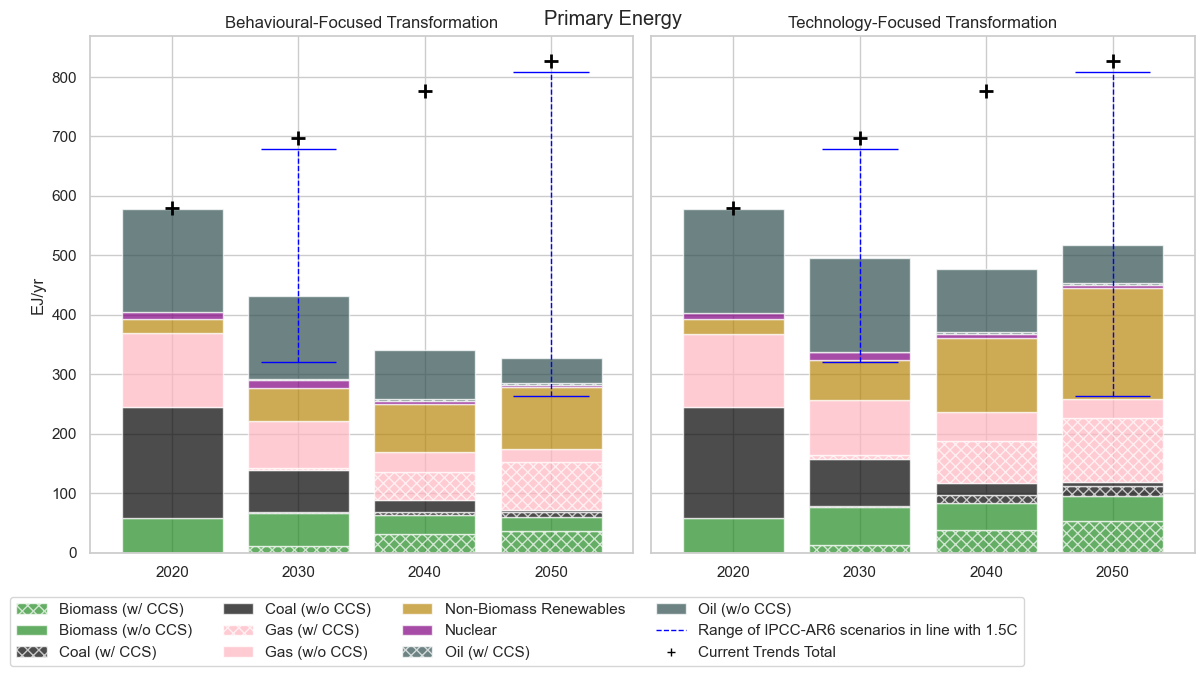

In [25]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","purple",])

variables_ccs = [
    'Primary Energy|Biomass|w/o CCS',
    'Primary Energy|Coal|w/o CCS',
    'Primary Energy|Gas|w/o CCS',
    'Primary Energy|Oil|w/o CCS',
    'Primary Energy|Nuclear',
    'Primary Energy|Non-Biomass Renewables',
    'Primary Energy|Biomass|w/ CCS',
    'Primary Energy|Coal|w/ CCS',
    'Primary Energy|Gas|w/ CCS',
    'Primary Energy|Oil|w/ CCS',
]

for variable in ['Primary Energy']:
    # Plotting
    fig, axes = plt.subplots(figsize=(12, 6), ncols=2, sharey=True)
    variable_name = variable.replace("(", "_").replace(")","").replace(" ", "_").replace("|", "_")
    variable_name = "11.1_" + variable_name
    output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
    with pd.ExcelWriter(output_file, mode='w', engine='openpyxl') as writer:
        for idx, scenario in enumerate(["Behaviour-focused", "Technology-focused"]):
            ax = axes[idx]
            print(df_energy_geo)
            df_total = df_total_energy.filter(variable=variable).data
            
            data = df_energy_geo.filter(variable=f'{variable}*', scenario=scenario)
            data_ccs = df_energy_geo.filter(variable=variables_ccs, scenario=scenario)
            rename_scenario = {
                'Behaviour-focused': 'Behavioural-Focused Transformation',
                'Technology-focused': 'Technology-Focused Transformation',
            }
            scenario_renamed = rename_scenario[scenario]
            
            desired_order = [
                'Primary Energy|Biomass|w/o CCS',
                'Primary Energy|Biomass|w CCS',
                'Primary Energy|Coal|w/o CCS',
                'Primary Energy|Coal|w CCS',
                'Primary Energy|Gas|w/o CCS',
                'Primary Energy|Gas|w CCS',
                'Primary Energy|Oil|w/o CCS',
                'Primary Energy|Oil|w CCS',
                'Primary Energy|Nuclear',
                'Primary Energy|Non-Biomass Renewables',
            ]
            # df_wo_ccs = data_ccs.data  
            # print(df_wo_ccs)
            # # Ensure data is ordered correctly
            # df_wo_ccs["variable"] = pd.Categorical(df_wo_ccs["variable"], categories=desired_order, ordered=True)
            # df_wo_ccs = df_wo_ccs.sort_values("variable")

            # # Convert back to IamDataFrame (if needed)
            # data_wo_ccs_ordered = pyam.IamDataFrame(df_wo_ccs)

            ccs_hatch_patterns = {
                'Primary Energy|Biomass|w/ CCS': 'xxx',  # Diagonal lines
                'Primary Energy|Coal|w/ CCS': 'xxx',    # Crosshatch
                'Primary Energy|Gas|w/ CCS': 'xxx',     # Plus sign
                'Primary Energy|Oil|w/ CCS': 'xxx',     # Horizontal lines
            }

            # Plot stacked bar chart
            data_ccs.plot.bar(title=scenario_renamed, stacked=True, ax=ax, alpha=0.7, width=0.8)

            # ASSIGN COLORS AND HATCHING
            var_list = data.variable
            patches = ax.patches
            num_variables = len(var_list)
            num_patches = len(patches)
            patch_counter = 0  # To track patches for each variable

            for i, var in enumerate(var_list):
                color = color_dict.get(var, 'firebrick')
                num_patches_per_var = num_patches // num_variables  # Adjust based on number of variables
                is_ccs_variable = 'w/ CCS' in var  # Check if the variable contains 'w/ CCS'
                
                # Loop over the patches and assign colors and hatching
                for j in range(num_patches_per_var):
                    patches[patch_counter].set_facecolor(color)
                    
                    # Apply hatching for 'w/ CCS' variables with unique patterns
                    if is_ccs_variable:
                        hatch_pattern = ccs_hatch_patterns.get(var, '')  # Get the unique hatch pattern for the variable
                        patches[patch_counter].set_hatch(hatch_pattern)
                    
                    patch_counter += 1  # Move to the next patch

            for _, row in df_total.iterrows():
                x_position_dict = {2020: 0, 2030: 1, 2040: 2, 2050: 3}
                x_position = x_position_dict[row["year"]]
                
                ax.plot(x_position, row["value"], color='black', marker='+', markersize=10, 
                        markeredgewidth=2, markeredgecolor='black', markerfacecolor='none', linestyle='--')
            
            df_ar6_energy_c1_data = df_ar6_energy_c1.filter(variable=variable).data

            min_values_c1 = df_ar6_energy_c1_data.groupby('year')['value'].min()
            max_values_c1 = df_ar6_energy_c1_data.groupby('year')['value'].max()
            legend_label = 'Range of IPCC-AR6 scenarios in line with 1.5C'
            color = 'blue'

            cap_width = 0.3
            for year in min_values_c1.index:
                if year == 2030:
                    x_position = 1
                if year == 2050:
                    x_position = 3
                ax.vlines(x=x_position, ymin=min_values_c1[year], ymax=max_values_c1[year], color=color, linestyle='--', lw=1)
                # Caps
                ax.hlines(y=min_values_c1[year], xmin=x_position - cap_width, xmax=x_position + cap_width, color=color, lw=1)
                ax.hlines(y=max_values_c1[year], xmin=x_position - cap_width, xmax=x_position + cap_width, color=color, lw=1)

            ax.set(xlabel=None)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
            ax.legend().set_visible(False)
            plt.tight_layout()
            # Apply the rename mapping to variables
            rename_variables = {
                'Primary Energy|Biomass|w/o CCS': 'Biomass (w/o CCS)',
                'Primary Energy|Coal|w/o CCS': 'Coal (w/o CCS)',
                'Primary Energy|Gas|w/o CCS': 'Gas (w/o CCS)',
                'Primary Energy|Oil|w/o CCS': 'Oil (w/o CCS)',
                'Primary Energy|Nuclear': 'Nuclear',
                'Primary Energy|Non-Biomass Renewables': 'Non-Biomass Renewables',
                'Primary Energy|Biomass|w/ CCS': 'Biomass (w/ CCS)',
                'Primary Energy|Coal|w/ CCS': 'Coal (w/ CCS)',
                'Primary Energy|Gas|w/ CCS': 'Gas (w/ CCS)',
                'Primary Energy|Oil|w/ CCS': 'Oil (w/ CCS)',
            }
            data = data.rename(variable=rename_variables)
            data = data.timeseries()
            data = data.reset_index()
            data = data.drop(columns=['model','scenario','region'])
            IPCC_data_2030 = pd.DataFrame({
                2030: [min_values_c1[2030], max_values_c1[2030]],
                2050: [min_values_c1[2050], max_values_c1[2050]],
                'unit': 'EJ/yr',
                'variable': ['Range of IPCC-AR6 scenarios in line with 1.5C', 'Range of IPCC-AR6 scenarios in line with 1.5C']
            })
            
            data = pd.concat([data, IPCC_data_2030])
            df_total = df_total_energy.filter(variable=variable)
            current_trend_data = df_total.timeseries()
            current_trend_data = current_trend_data.reset_index()
            current_trend_data = current_trend_data.drop(columns=['model','scenario','region'])
            current_trend_data = current_trend_data.replace({'Primary Energy': 'Current Trends Total'})
            data = pd.concat([data, current_trend_data])
            data.to_excel(writer, sheet_name=scenario, index=False)

    handles, labels = axes[1].get_legend_handles_labels()
    blue_line = Line2D([0], [0], color=color, lw=1, linestyle='--')
    handles.append(blue_line)  
    labels.append(legend_label) 
    black_line = Line2D([0], [0], color='black', lw=1, marker='+', linestyle='None')
    handles.append(black_line)
    labels.append('Current Trends Total')
    labels = [rename_variables.get(item, item.split('|')[-1]) for item in labels]
    axes[1].legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(0.7, -0.07), ncol=4)
    fig.suptitle(f'{variable}')
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")


## 11.2
- Secondary energy (behaviour)
- Primary energy (tech)

    model        scenario region                      variable   unit  year  \
0  Energy  Current Trends  World  Secondary Energy|Electricity  EJ/yr  2020   
1  Energy  Current Trends  World  Secondary Energy|Electricity  EJ/yr  2030   
2  Energy  Current Trends  World  Secondary Energy|Electricity  EJ/yr  2040   
3  Energy  Current Trends  World  Secondary Energy|Electricity  EJ/yr  2050   

   value  
0  100.0  
1  131.0  
2  165.0  
3  203.0  
<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Energy (1)
 * scenario : Behaviour-focused (1)
Timeseries data coordinates:
   region   : World (1)
   variable : Secondary Energy|Electricity|Biomass, ... (6)
   unit     : EJ/yr (1)
   year     : 2020, 2030, 2040, 2050 (4)


c:\PBLprogs\miniforge3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


    model        scenario region                      variable   unit  year  \
0  Energy  Current Trends  World  Secondary Energy|Electricity  EJ/yr  2020   
1  Energy  Current Trends  World  Secondary Energy|Electricity  EJ/yr  2030   
2  Energy  Current Trends  World  Secondary Energy|Electricity  EJ/yr  2040   
3  Energy  Current Trends  World  Secondary Energy|Electricity  EJ/yr  2050   

   value  
0  100.0  
1  131.0  
2  165.0  
3  203.0  
<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Energy (1)
 * scenario : Technology-focused (1)
Timeseries data coordinates:
   region   : World (1)
   variable : Secondary Energy|Electricity|Biomass, ... (6)
   unit     : EJ/yr (1)
   year     : 2020, 2030, 2040, 2050 (4)


c:\PBLprogs\miniforge3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


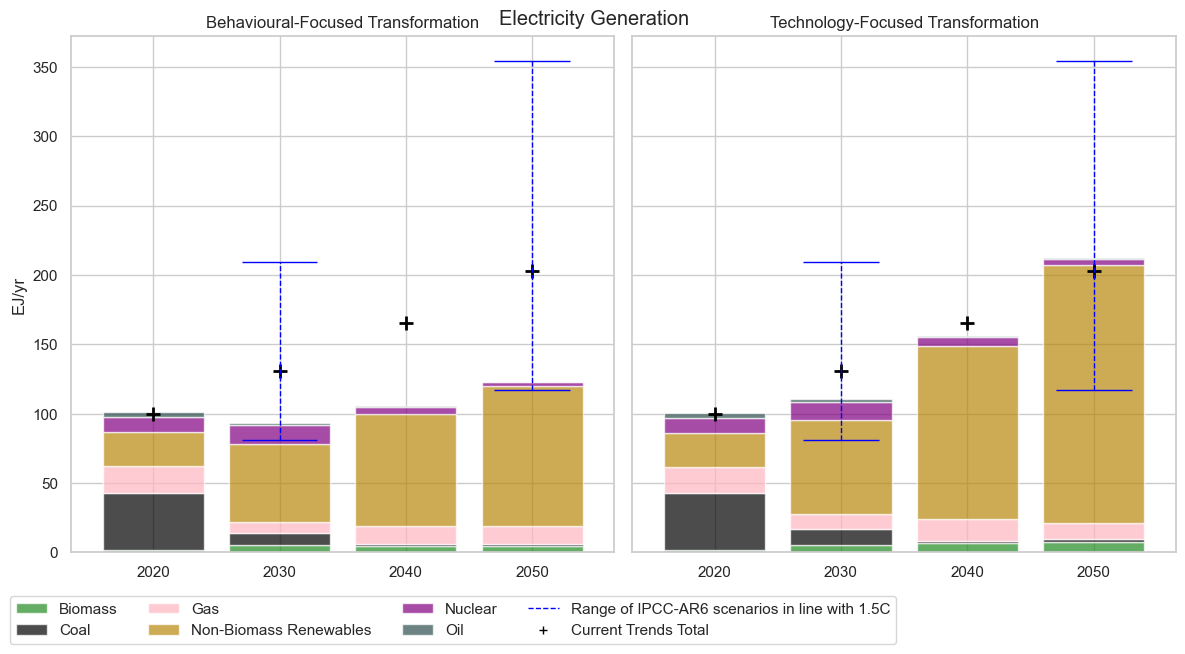

In [14]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["yellow","purple",])
for variable in ['Secondary Energy|Electricity']:
    # Plotting
    fig, axes = plt.subplots(figsize=(12, 6), ncols=2, sharey=True)
    variable_name = variable.replace("(", "_").replace(")","").replace(" ", "_").replace("|", "_")
    variable_name = "11.2_" + variable_name
    output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
    with pd.ExcelWriter(output_file, mode='w', engine='openpyxl') as writer:
        for idx, scenario in enumerate(["Behaviour-focused", "Technology-focused"]):
            ax = axes[idx]
            df_total = df_total_energy.filter(variable=variable).data
            print(df_total)
            data = df_energy_geo.filter(variable=f'{variable}*', scenario=scenario)
            print(data)
            rename_scenario = {
                'Behaviour-focused': 'Behavioural-Focused Transformation',
                'Technology-focused': 'Technology-Focused Transformation',
            }
            scenario = rename_scenario[scenario]
            
            # Plot stacked bar chart
            data.plot.bar(title=scenario ,stacked=True, ax=ax, alpha=0.7, width=0.8, cmap="tab20")

            # ASSIGN COLORS
            # Now loop through the segments of each bar (patches)
            var_list = data.variable
            patches = ax.patches
            num_variables = len(var_list)
            num_patches = len(patches)
            patch_counter = 0  # To track patches for each variable
            for i, var in enumerate(var_list):
                color = color_dict.get(var, 'firebrick')  
                num_patches_per_var = num_patches // num_variables  
                # Loop over the patches and assign colors to the correct ones
                for j in range(num_patches_per_var):
                    patches[patch_counter].set_facecolor(color)
                    patch_counter += 1  # Move to the next patch

            for _, row in df_total.iterrows():
                x_position_dict = {2020: 0, 2030: 1, 2040: 2, 2050: 3}
                x_position = x_position_dict[row["year"]]
                
                ax.plot(x_position, row["value"], color='black', marker='+', markersize=10, 
                        markeredgewidth=2, markeredgecolor='black', markerfacecolor='none', linestyle='--')
            
            df_ar6_energy_c1_data = df_ar6_energy_c1.filter(variable=variable).data

            min_values_c1 = df_ar6_energy_c1_data.groupby('year')['value'].min()
            max_values_c1 = df_ar6_energy_c1_data.groupby('year')['value'].max()
            legend_label = 'Range of IPCC-AR6 scenarios in line with 1.5C'
            color = 'blue'

            cap_width = 0.3
            for year in min_values_c1.index:
                if year == 2030:
                    x_position = 1
                if year == 2050:
                    x_position = 3
                ax.vlines(x=x_position, ymin=min_values_c1[year], ymax=max_values_c1[year], color=color, linestyle='--', lw=1)
                # Caps
                ax.hlines(y=min_values_c1[year], xmin=x_position - cap_width, xmax=x_position + cap_width, color=color, lw=1)
                ax.hlines(y=max_values_c1[year], xmin=x_position - cap_width, xmax=x_position + cap_width, color=color, lw=1)

            ax.set(xlabel=None)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
            ax.legend().set_visible(False)
            plt.tight_layout()
            # Apply the rename mapping to variables
            rename_variables = {
                'Secondary Energy|Electricity|Coal': 'Coal',
                'Secondary Energy|Electricity|Oil': 'Oil',
                'Secondary Energy|Electricity|Gas': 'Gas',
                'Secondary Energy|Electricity|Biomass': 'Biomass',
                'Secondary Energy|Electricity|Nuclear': 'Nuclear',
                'Secondary Energy|Electricity|Non-Biomass Renewables': 'Non-Biomass Renewables',
            }
            data = data.rename(variable=rename_variables)
            data = data.timeseries()
            data = data.reset_index()
            data = data.drop(columns=['model','scenario','region'])
            IPCC_data_2030 = pd.DataFrame({
                2030: [min_values_c1[2030], max_values_c1[2030]],
                2050: [min_values_c1[2050], max_values_c1[2050]],
                'unit': 'EJ/yr',
                'variable': ['Range of IPCC-AR6 scenarios in line with 1.5C', 'Range of IPCC-AR6 scenarios in line with 1.5C']
            })
            data = pd.concat([data, IPCC_data_2030])
            df_total = df_total_energy.filter(variable=variable)
            current_trend_data = df_total.timeseries()
            current_trend_data = current_trend_data.reset_index()
            current_trend_data = current_trend_data.drop(columns=['model','scenario','region'])
            current_trend_data = current_trend_data.replace({'Secondary Energy|Electricity': 'Current Trends Total'})
            data = pd.concat([data, current_trend_data])
            
            data.to_excel(writer, sheet_name=scenario, index=False)

    handles, labels = axes[1].get_legend_handles_labels()
    blue_line = Line2D([0], [0], color=color, lw=1, linestyle='--')
    handles.append(blue_line)  
    labels.append(legend_label) 
    black_line = Line2D([0], [0], color='black', lw=1, marker='+', linestyle='None')
    handles.append(black_line)
    labels.append('Current Trends Total')
    labels = [item.split('|')[-1] for item in labels]
    axes[1].legend(handles=handles, labels=labels, loc='upper right', bbox_to_anchor=(0.5, -0.07), ncol=4)
    fig.suptitle('Electricity Generation')
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

## 11.3
- Consumption crop based products
- Consumption animal based products

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\3949274839.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker_data["year"] = marker_data["year"].astype(str)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\3949274839.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar6_data["year"] = ar6_data["year"].astype(str)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\3949274839.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

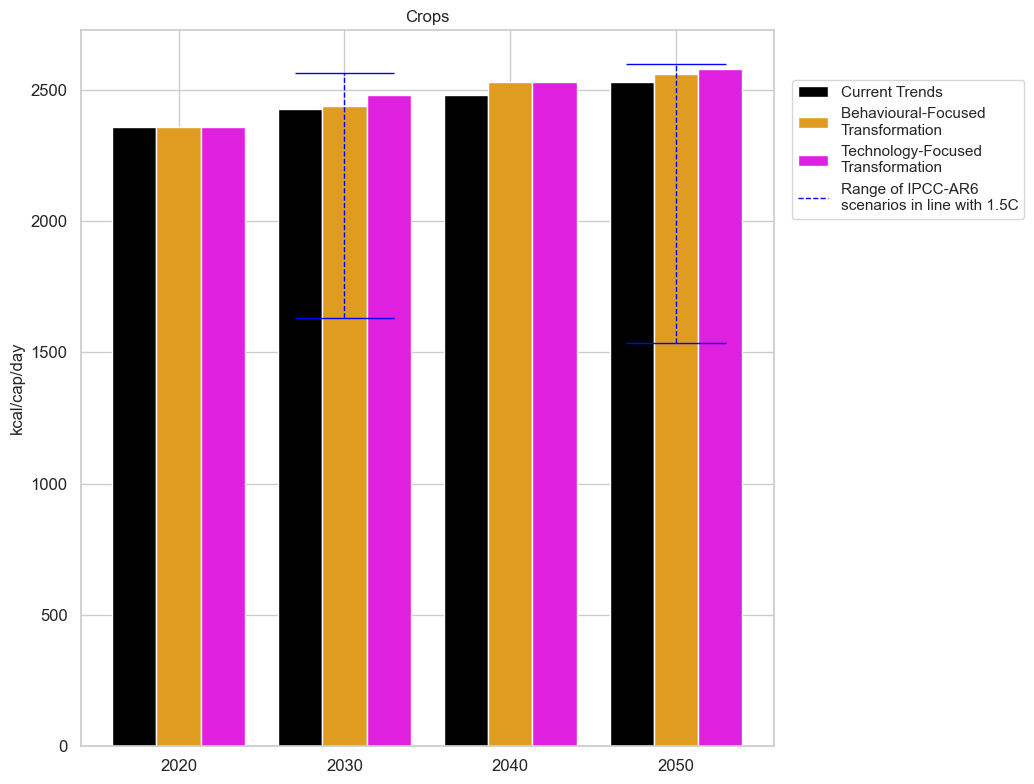

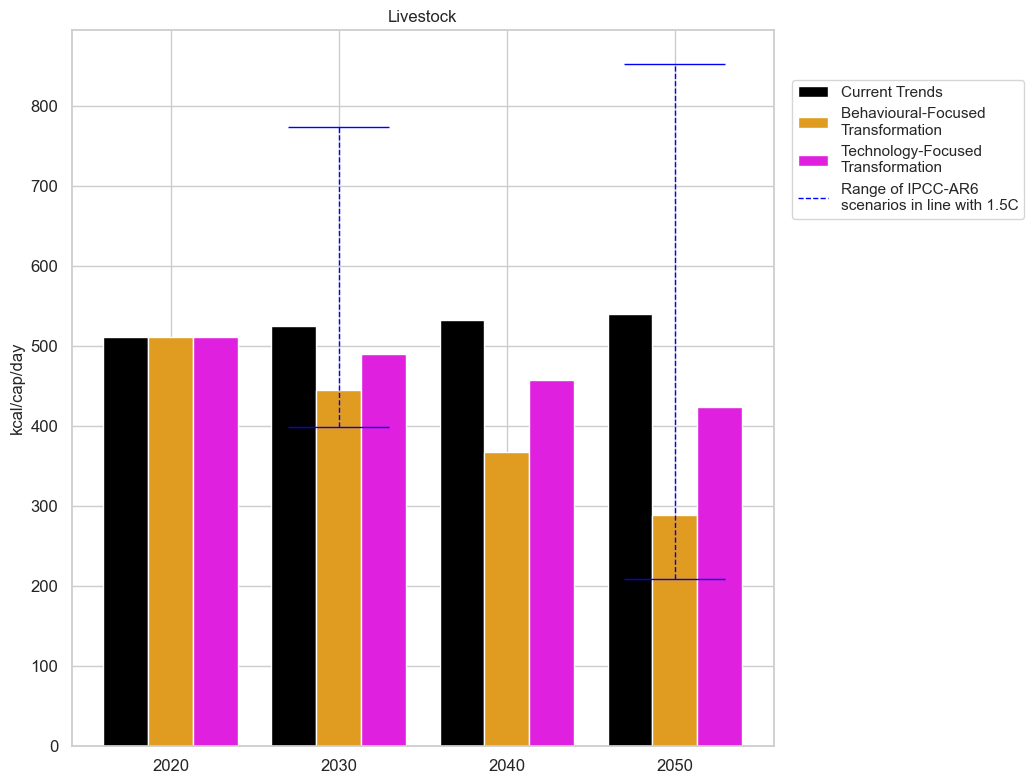

In [16]:
variables = df_marker_data.variable.unique()

report_variables =[
        #'Emissions|CO2',
        #'Emissions|Kyoto Gases',
        #'Emissions|N2O',
        #'Emissions|CH4',
        #'Agricultural Production|Non-Energy|Crops',
        #'Agricultural Production|Non-Energy|Livestock',
        'Food Demand|Crops',
        'Food Demand|Livestock',
        #'Yield|Cereal'
    ]
# variables = ['Emissions|CO2']
for variable in report_variables:
    # Use Seaborn to create the plot with markers and lines
    marker_data = df_marker_data[df_marker_data["variable"] == variable]
    marker_data["year"] = marker_data["year"].astype(str)

    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    ar6_data["year"] = ar6_data["year"].astype(str)

    # # Define the color palette for scenarios
    scenario_colors = {
        "Current Trends": "black",
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }

    fig, ax = plt.subplots(figsize=(8, 8))
    desired_scenario_order = ["Current Trends"] + [s for s in marker_data["scenario"].unique() if s != "Current Trends"]
    # Convert 'scenario' column to a categorical type with the desired order
    marker_data["scenario"] = pd.Categorical(marker_data["scenario"], categories=desired_scenario_order, ordered=True)

    sns.barplot(
        data=marker_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=ax,
        order=sorted(marker_data["year"].unique())
    )

    cap_width = 0.3
    
    x_positions = {year: idx for idx, year in enumerate(sorted(marker_data["year"].unique()))}
    for year in ar6_data["year"].unique():
        year_data = ar6_data[ar6_data["year"] == year]
        value_min = year_data["value"].min()
        value_max = year_data["value"].max()
        if year in x_positions:  # Only plot for existing bars
            x_pos = x_positions[year]

            ax.vlines(x=x_pos, ymin=value_min, ymax=value_max, color='blue', linestyle='--', lw=1)
            ax.hlines(y=value_min, xmin=x_pos - cap_width, xmax=x_pos + cap_width, color='blue', lw=1)
            ax.hlines(y=value_max, xmin=x_pos - cap_width, xmax=x_pos + cap_width, color='blue', lw=1)
    
    ax.legend().set_visible(False)
    # Set labels and titl
    plt.xlabel('')
    plt.ylabel(marker_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    title = variable.replace("Food Demand|","")
    plt.title(title)  # Set the title to the variable
    plt.xticks(rotation=0,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Add Legend manually
    handles, labels = ax.get_legend_handles_labels()
    rename_variables = {
        "Behaviour-focused": "Behavioural-Focused \nTransformation",
        "Technology-focused": "Technology-Focused \nTransformation",
    }
    new_labels = [rename_variables.get(label, label) for label in labels]
    desired_order = ["Current Trends"] + [label for label in new_labels if label != "Current Trends"]
    sorted_handles_labels = sorted(zip(handles, new_labels), key=lambda x: desired_order.index(x[1]))
    sorted_handles, sorted_labels = map(list, zip(*sorted_handles_labels))
    blue_line = Line2D([0], [0], color='blue', lw=1, linestyle='--')
    sorted_handles.append(blue_line)
    sorted_labels.append('Range of IPCC-AR6 \nscenarios in line with 1.5C')
    fig.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.3, 0.9))

    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    variable_name = "11.3_" + title
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

    years = sorted(marker_data["year"].unique())
    output_data = []

    # Iterate over each unique scenario
    for scenario in marker_data["scenario"].unique():
        # Initialize a dictionary to hold data for the current scenario
        variable_data = {"variable": scenario, "unit": marker_data["unit"].iloc[0]}
        
        # Initialize IPCC data
        ipcc_min_data = {"variable": "Range of IPCC-AR6 scenarios in line with 1.5C", "unit": marker_data["unit"].iloc[0]}
        ipcc_max_data = {"variable": "Range of IPCC-AR6 scenarios in line with 1.5C", "unit": marker_data["unit"].iloc[0]}
        
        # Iterate over each year
        for year in years:
            # Get the value for the current scenario and year
            marker_value = marker_data.loc[(marker_data["year"] == year) & (marker_data["scenario"] == scenario), "value"]
            
            # Assign the value to the dictionary for the scenario
            variable_data[year] = marker_value.iloc[0] if not marker_value.empty else None
            
            # Get min/max values from the IPCC data (filter by year and scenario)
            if year == "2030" or year == "2050":
                ipcc_values = ar6_data.loc[ar6_data["year"] == year, "value"]
                ipcc_min_data[year] = ipcc_values.min() if not ipcc_values.empty else None
                ipcc_max_data[year] = ipcc_values.max() if not ipcc_values.empty else None

        # Append the current scenario data
        output_data.append(variable_data)

    # Append the IPCC data for min and max
    output_data.append(ipcc_min_data)
    output_data.append(ipcc_max_data)

    # Convert the output data into a DataFrame
    df_output = pd.DataFrame(output_data)

    # Output the result to Excel
    output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
    df_output.to_excel(output_file, index=False)
    

    


## 11.4
- Food crop production
- Livestock production

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\1090386226.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker_data["year"] = marker_data["year"].astype(str)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\1090386226.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar6_data["year"] = ar6_data["year"].astype(str)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\1090386226.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

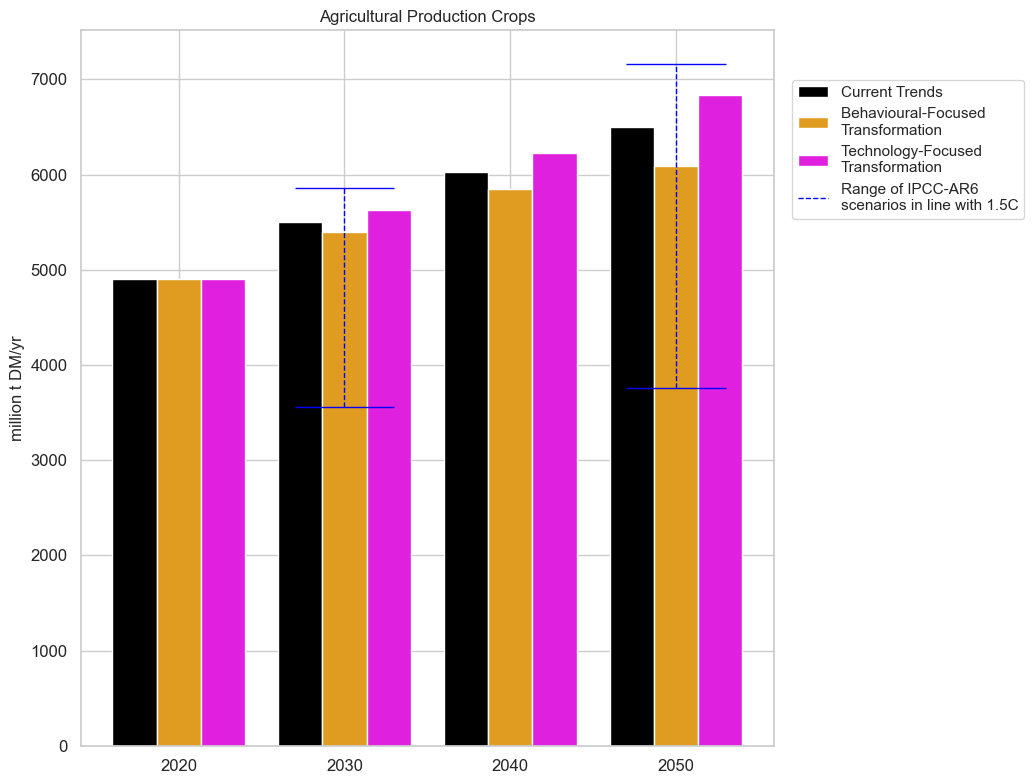

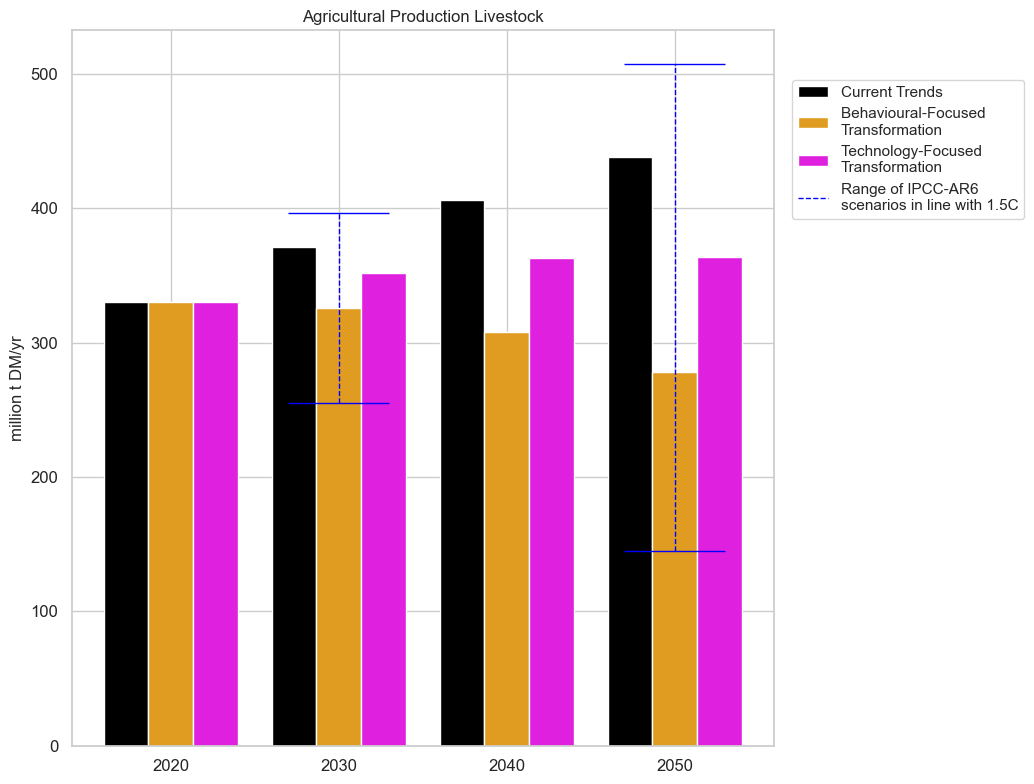

In [17]:
variables = df_marker_data.variable.unique()

report_variables =[
        #'Emissions|CO2',
        #'Emissions|Kyoto Gases',
        #'Emissions|N2O',
        #'Emissions|CH4',
        'Agricultural Production|Non-Energy|Crops',
        'Agricultural Production|Non-Energy|Livestock',
        #'Food Demand|Crops',
        #'Food Demand|Livestock',
        #'Yield|Cereal'
    ]
# variables = ['Emissions|CO2']
for variable in report_variables:
    # Use Seaborn to create the plot with markers and lines
    marker_data = df_marker_data[df_marker_data["variable"] == variable]
    marker_data["year"] = marker_data["year"].astype(str)

    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    ar6_data["year"] = ar6_data["year"].astype(str)

    # # Define the color palette for scenarios
    scenario_colors = {
        "Current Trends": "black",
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }

    fig, ax = plt.subplots(figsize=(8, 8))
    desired_scenario_order = ["Current Trends"] + [s for s in marker_data["scenario"].unique() if s != "Current Trends"]
    # Convert 'scenario' column to a categorical type with the desired order
    marker_data["scenario"] = pd.Categorical(marker_data["scenario"], categories=desired_scenario_order, ordered=True)

    sns.barplot(
        data=marker_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=ax,
        order=sorted(marker_data["year"].unique())
    )

    cap_width = 0.3
    
    x_positions = {year: idx for idx, year in enumerate(sorted(marker_data["year"].unique()))}
    for year in ar6_data["year"].unique():
        year_data = ar6_data[ar6_data["year"] == year]
        value_min = year_data["value"].min()
        value_max = year_data["value"].max()
        if year in x_positions:  # Only plot for existing bars
            x_pos = x_positions[year]

            ax.vlines(x=x_pos, ymin=value_min, ymax=value_max, color='blue', linestyle='--', lw=1)
            ax.hlines(y=value_min, xmin=x_pos - cap_width, xmax=x_pos + cap_width, color='blue', lw=1)
            ax.hlines(y=value_max, xmin=x_pos - cap_width, xmax=x_pos + cap_width, color='blue', lw=1)
    
    ax.legend().set_visible(False)
    # Set labels and titl
    plt.xlabel('')
    plt.ylabel(marker_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    title = variable.replace("|Non-Energy|"," ")
    plt.title(title)  # Set the title to the variable
    plt.xticks(rotation=0,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Add Legend manually
    handles, labels = ax.get_legend_handles_labels()
    rename_variables = {
        "Behaviour-focused": "Behavioural-Focused \nTransformation",
        "Technology-focused": "Technology-Focused \nTransformation",
    }
    new_labels = [rename_variables.get(label, label) for label in labels]
    desired_order = ["Current Trends"] + [label for label in new_labels if label != "Current Trends"]
    sorted_handles_labels = sorted(zip(handles, new_labels), key=lambda x: desired_order.index(x[1]))
    sorted_handles, sorted_labels = map(list, zip(*sorted_handles_labels))
    blue_line = Line2D([0], [0], color='blue', lw=1, linestyle='--')
    sorted_handles.append(blue_line)
    sorted_labels.append('Range of IPCC-AR6 \nscenarios in line with 1.5C')
    fig.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.3, 0.9))

    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    variable_name = "11.4_" + title
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

    years = sorted(marker_data["year"].unique())
    output_data = []

    # Iterate over each unique scenario
    for scenario in marker_data["scenario"].unique():
        # Initialize a dictionary to hold data for the current scenario
        variable_data = {"variable": scenario, "unit": marker_data["unit"].iloc[0]}
        
        # Initialize IPCC data
        ipcc_min_data = {"variable": "Range of IPCC-AR6 scenarios in line with 1.5C", "unit": marker_data["unit"].iloc[0]}
        ipcc_max_data = {"variable": "Range of IPCC-AR6 scenarios in line with 1.5C", "unit": marker_data["unit"].iloc[0]}
        
        # Iterate over each year
        for year in years:
            # Get the value for the current scenario and year
            marker_value = marker_data.loc[(marker_data["year"] == year) & (marker_data["scenario"] == scenario), "value"]
            
            # Assign the value to the dictionary for the scenario
            variable_data[year] = marker_value.iloc[0] if not marker_value.empty else None
            
            # Get min/max values from the IPCC data (filter by year and scenario)
            if year == "2030" or year == "2050":
                ipcc_values = ar6_data.loc[ar6_data["year"] == year, "value"]
                ipcc_min_data[year] = ipcc_values.min() if not ipcc_values.empty else None
                ipcc_max_data[year] = ipcc_values.max() if not ipcc_values.empty else None

        # Append the current scenario data
        output_data.append(variable_data)

    # Append the IPCC data for min and max
    output_data.append(ipcc_min_data)
    output_data.append(ipcc_max_data)

    # Convert the output data into a DataFrame
    df_output = pd.DataFrame(output_data)

    # Output the result to Excel
    output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
    df_output.to_excel(output_file, index=False)

## 11.5
- Cereal Yield

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\1785985909.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker_data["year"] = marker_data["year"].astype(str)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\1785985909.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar6_data["year"] = ar6_data["year"].astype(str)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\1785985909.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

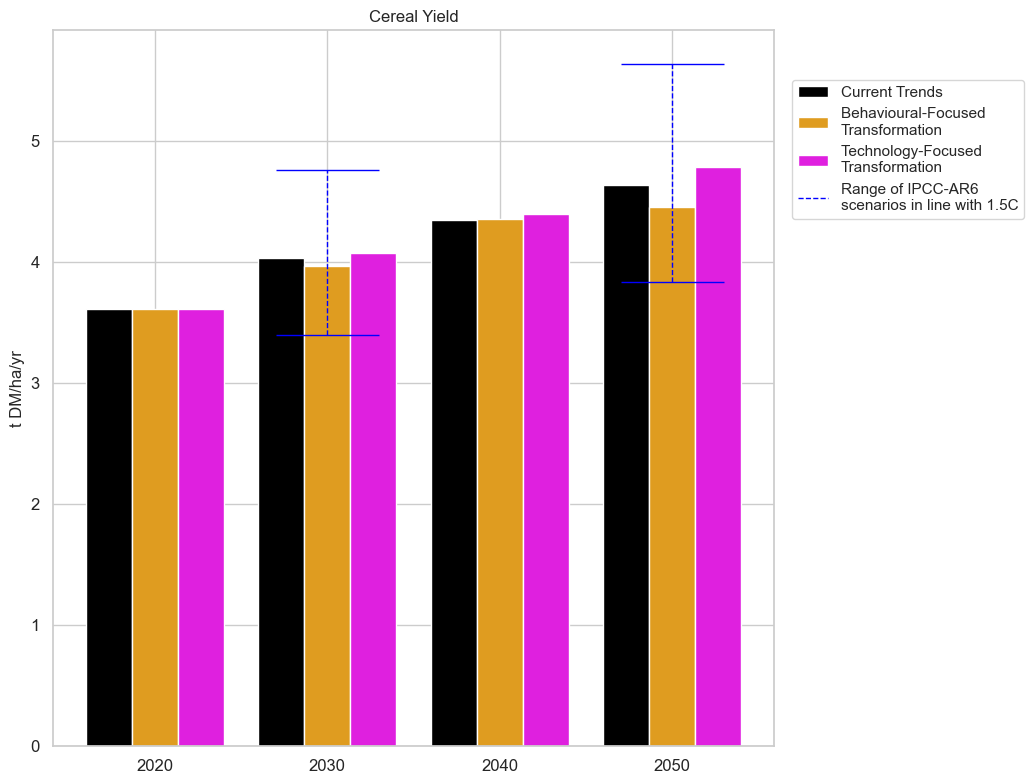

In [18]:
variables = df_marker_data.variable.unique()

report_variables =[
        #'Emissions|CO2',
        #'Emissions|Kyoto Gases',
        #'Emissions|N2O',
        #'Emissions|CH4',
        #'Agricultural Production|Non-Energy|Crops',
        #'Agricultural Production|Non-Energy|Livestock',
        #'Food Demand|Crops',
        #'Food Demand|Livestock',
        'Yield|Cereal'
    ]
# variables = ['Emissions|CO2']
for variable in report_variables:
    # Use Seaborn to create the plot with markers and lines
    marker_data = df_marker_data[df_marker_data["variable"] == variable]
    marker_data["year"] = marker_data["year"].astype(str)

    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    ar6_data["year"] = ar6_data["year"].astype(str)

    # # Define the color palette for scenarios
    scenario_colors = {
        "Current Trends": "black",
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }

    fig, ax = plt.subplots(figsize=(8, 8))
    desired_scenario_order = ["Current Trends"] + [s for s in marker_data["scenario"].unique() if s != "Current Trends"]
    # Convert 'scenario' column to a categorical type with the desired order
    marker_data["scenario"] = pd.Categorical(marker_data["scenario"], categories=desired_scenario_order, ordered=True)

    sns.barplot(
        data=marker_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=ax,
        order=sorted(marker_data["year"].unique())
    )

    cap_width = 0.3
    
    x_positions = {year: idx for idx, year in enumerate(sorted(marker_data["year"].unique()))}
    for year in ar6_data["year"].unique():
        year_data = ar6_data[ar6_data["year"] == year]
        value_min = year_data["value"].min()
        value_max = year_data["value"].max()
        if year in x_positions:  # Only plot for existing bars
            x_pos = x_positions[year]

            ax.vlines(x=x_pos, ymin=value_min, ymax=value_max, color='blue', linestyle='--', lw=1)
            ax.hlines(y=value_min, xmin=x_pos - cap_width, xmax=x_pos + cap_width, color='blue', lw=1)
            ax.hlines(y=value_max, xmin=x_pos - cap_width, xmax=x_pos + cap_width, color='blue', lw=1)
    
    ax.legend().set_visible(False)
    # Set labels and titl
    plt.xlabel('')
    plt.ylabel(marker_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    title = variable.replace("Yield|Cereal", "Cereal Yield")
    plt.title(title)  # Set the title to the variable
    plt.xticks(rotation=0,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Add Legend manually
    handles, labels = ax.get_legend_handles_labels()
    rename_variables = {
        "Behaviour-focused": "Behavioural-Focused \nTransformation",
        "Technology-focused": "Technology-Focused \nTransformation",
    }
    new_labels = [rename_variables.get(label, label) for label in labels]
    desired_order = ["Current Trends"] + [label for label in new_labels if label != "Current Trends"]
    sorted_handles_labels = sorted(zip(handles, new_labels), key=lambda x: desired_order.index(x[1]))
    sorted_handles, sorted_labels = map(list, zip(*sorted_handles_labels))
    blue_line = Line2D([0], [0], color='blue', lw=1, linestyle='--')
    sorted_handles.append(blue_line)
    sorted_labels.append('Range of IPCC-AR6 \nscenarios in line with 1.5C')
    fig.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.3, 0.9))

    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    variable_name = "11.5_" + title
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

    years = sorted(marker_data["year"].unique())
    output_data = []

    # Iterate over each unique scenario
    for scenario in marker_data["scenario"].unique():
        # Initialize a dictionary to hold data for the current scenario
        variable_data = {"variable": scenario, "unit": marker_data["unit"].iloc[0]}
        
        # Initialize IPCC data
        ipcc_min_data = {"variable": "Range of IPCC-AR6 scenarios in line with 1.5C", "unit": marker_data["unit"].iloc[0]}
        ipcc_max_data = {"variable": "Range of IPCC-AR6 scenarios in line with 1.5C", "unit": marker_data["unit"].iloc[0]}
        
        # Iterate over each year
        for year in years:
            # Get the value for the current scenario and year
            marker_value = marker_data.loc[(marker_data["year"] == year) & (marker_data["scenario"] == scenario), "value"]
            
            # Assign the value to the dictionary for the scenario
            variable_data[year] = marker_value.iloc[0] if not marker_value.empty else None
            
            # Get min/max values from the IPCC data (filter by year and scenario)
            if year == "2030" or year == "2050":
                ipcc_values = ar6_data.loc[ar6_data["year"] == year, "value"]
                ipcc_min_data[year] = ipcc_values.min() if not ipcc_values.empty else None
                ipcc_max_data[year] = ipcc_values.max() if not ipcc_values.empty else None

        # Append the current scenario data
        output_data.append(variable_data)

    # Append the IPCC data for min and max
    output_data.append(ipcc_min_data)
    output_data.append(ipcc_max_data)

    # Convert the output data into a DataFrame
    df_output = pd.DataFrame(output_data)

    # Output the result to Excel
    output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
    df_output.to_excel(output_file, index=False)

## 11.7
- Material extraction
- Material consumption per capita
- Material extraction relative to REF
- Resource productivity

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\804853905.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker_data["year"] = marker_data["year"].astype(str)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\804853905.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker_data["scenario"] = pd.Categorical(marker_data["scenario"], categories=desired_scenario_order, ordered=True)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13184\804853905.py:148: UserWarning: set_ticklabels() sh

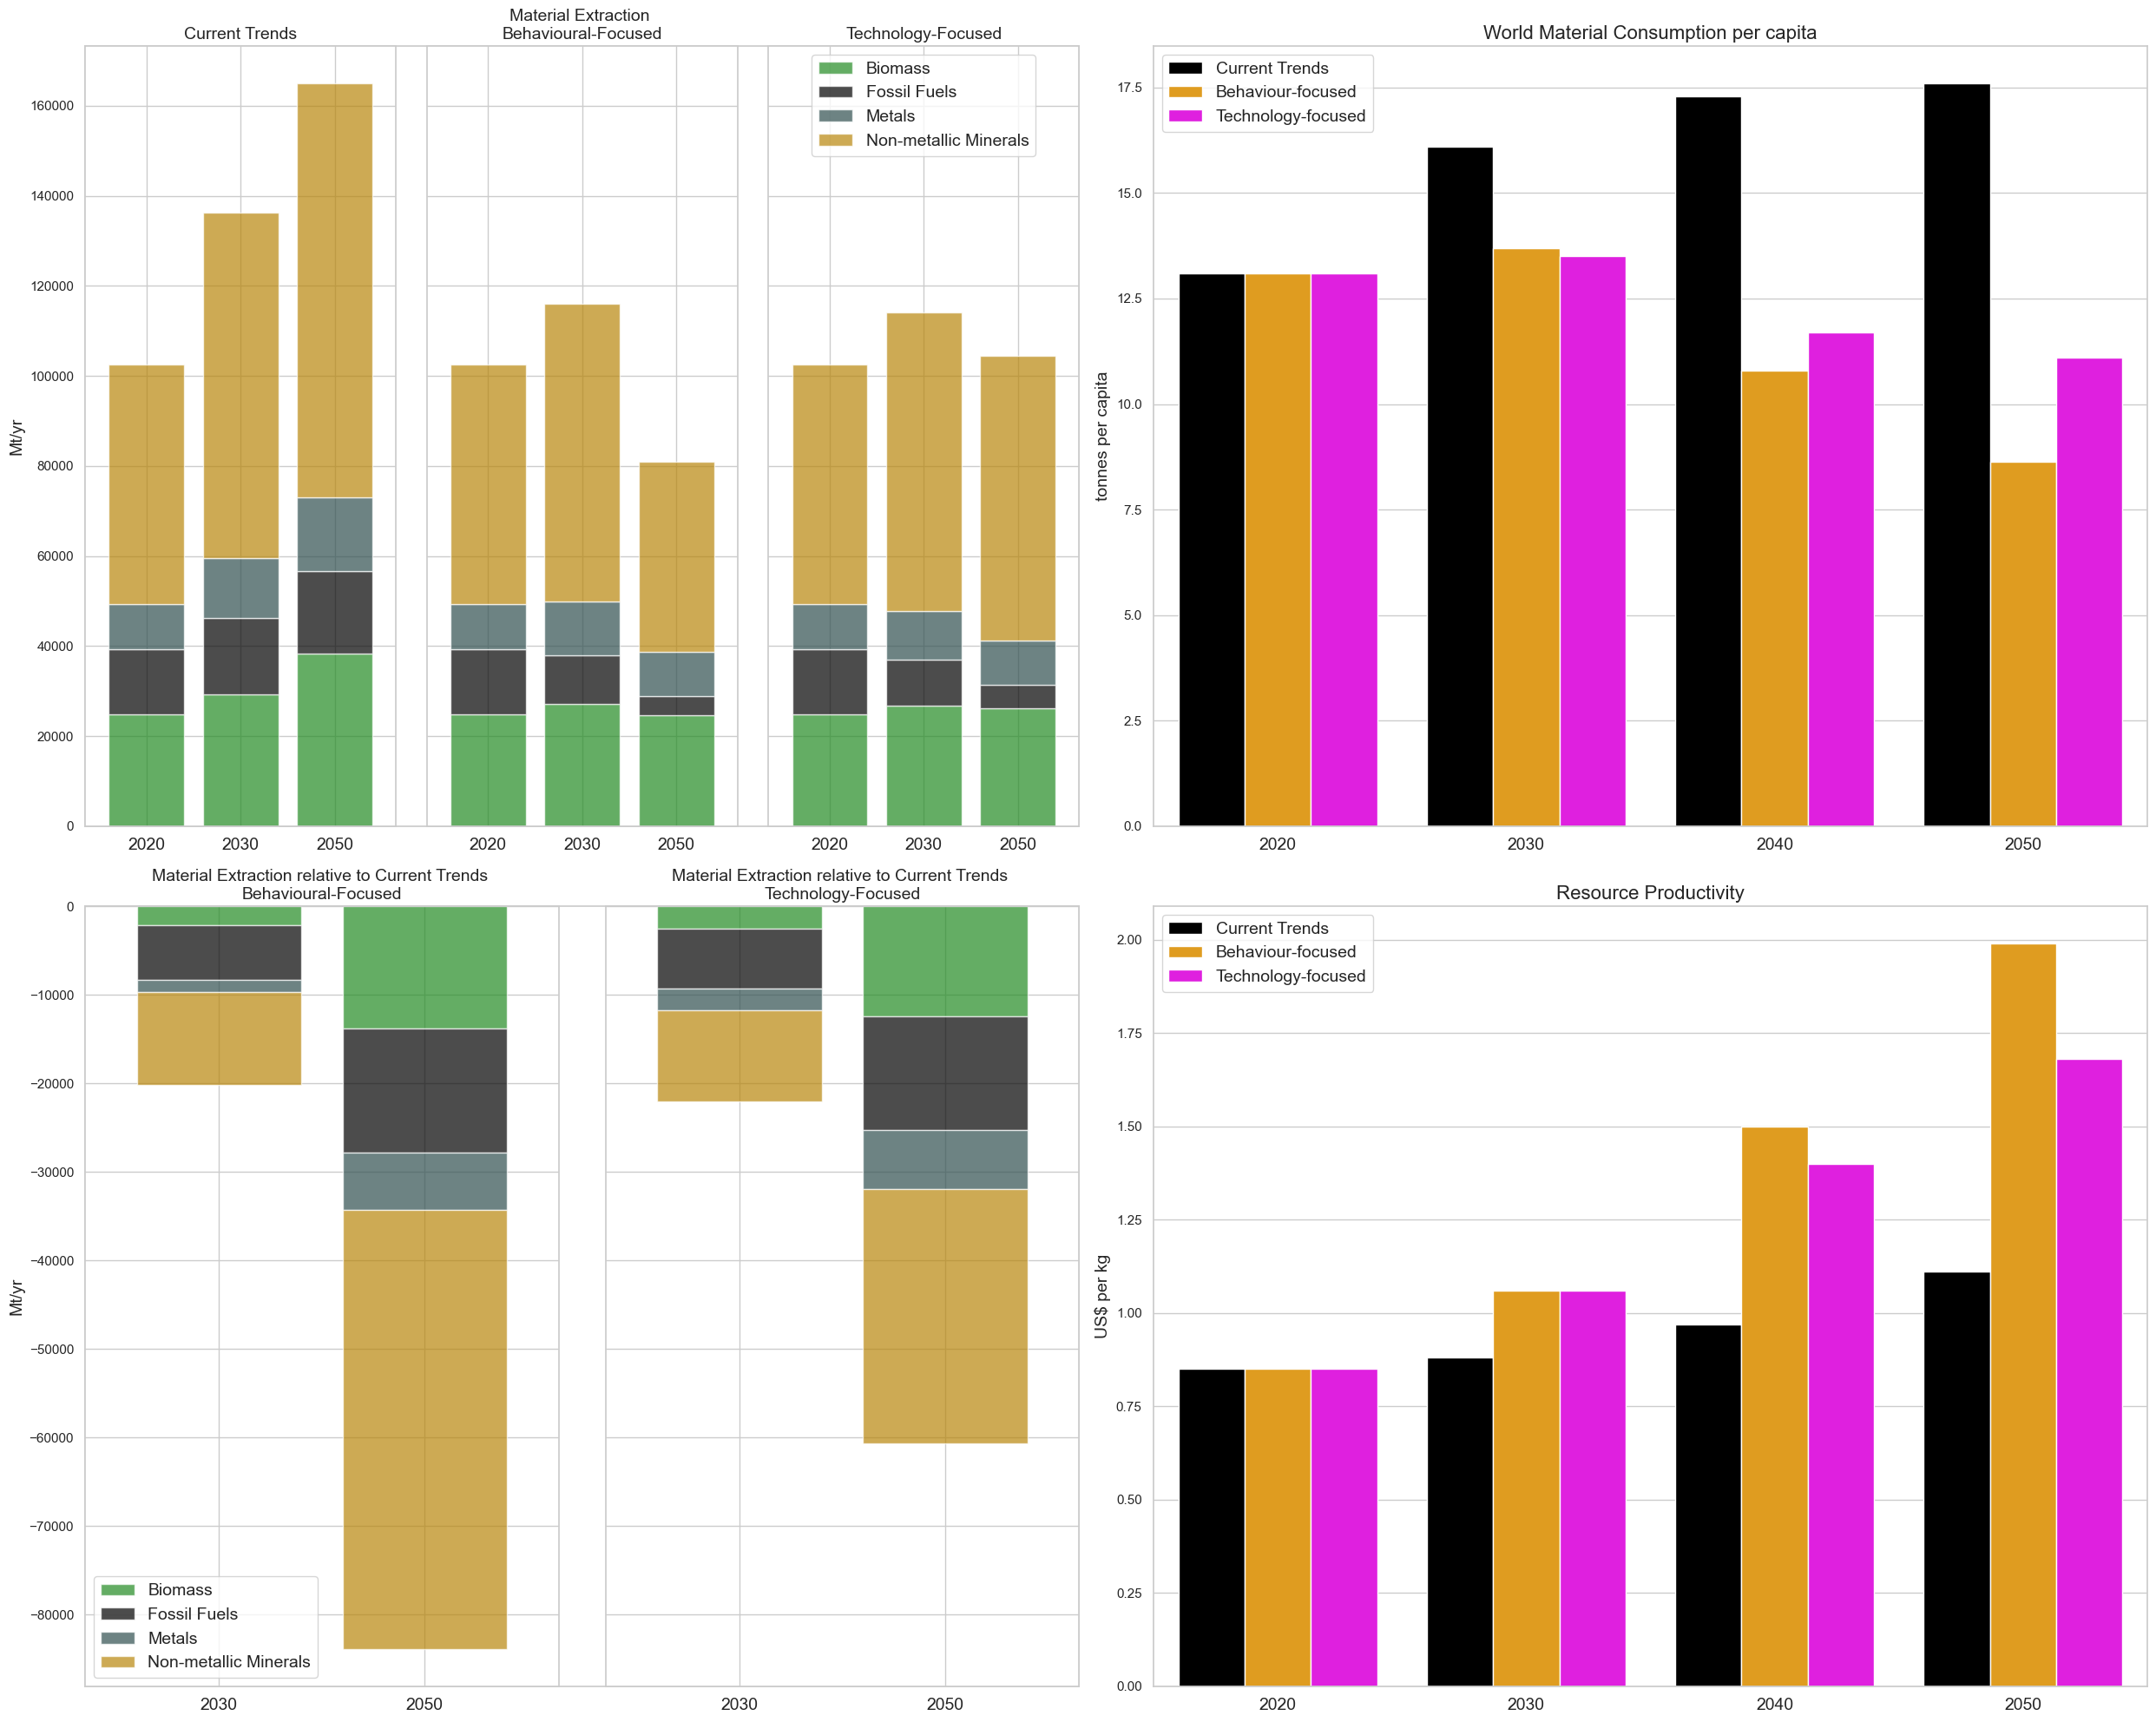

In [19]:
import matplotlib.gridspec as gridspec
var_dict =  {
    'World Material Extraction':[[
        'DE|Biomass',
        'DE|Fossil Fuel',
        'DE|Metal Ores',
        'DE|Non-metallic Minerals',
    ]],
    'World Material Consumption per capita':[[
        'DE|Total per capita',
    ]],
    'Changes in World Material Extraction Relative to Current Trends':[[
        'DE|Biomass Difference',
        'DE|Fossil Fuel Difference',
        'DE|Metal Ores Difference',
        'DE|Non-metallic Minerals Difference',
    ]],
    'Resource Productivity':[[
        'Resource Productivity'
    ]]        
    }
report_variables = [
    'DE|Total per capita',
    'Resource Productivity'
]
rename_variables = {
    'DE|Biomass': 'Biomass',
    'DE|Fossil Fuel': 'Fossil Fuels',
    'DE|Metal Ores': 'Metals',
    'DE|Non-metallic Minerals': 'Non-metallic Minerals',
    'DE|Biomass Difference': 'Biomass',
    'DE|Fossil Fuel Difference': 'Fossil Fuels',
    'DE|Metal Ores Difference': 'Metals',
    'DE|Non-metallic Minerals Difference': 'Non-metallic Minerals',
}
rename_scenarios = {
"Current Trends": "Current Trends",
"Behaviour-focused": "Behavioural-Focused Transformation",
"Technology-focused": "Technology-Focused Transformation",
}
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 20))

axes = axes.flatten()
for i, (share, ax) in enumerate(zip(var_dict.keys(), axes)):  # Iterate through subplots
    var_list = var_dict[share][0]
    if share == 'World Material Extraction':  # Facet only this subplot
        gs = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=ax.get_subplotspec(), wspace=0.1)  # Reduce space between facets
        facet_axes = [fig.add_subplot(gs[0, j]) for j in range(3)]
        for j in range(1, len(facet_axes)):
            facet_axes[j].sharey(facet_axes[0]) # Share y-axis
        data_2020 = df_GTEM_image.filter(variable=var_list, year=2020, scenario="Current Trends")
        data_2030 = df_GTEM_image.filter(variable=var_list, year=2030)
        data_2050 = df_GTEM_image.filter(variable=var_list, year=2050)
        data_combined = data_2020.append(data_2030)
        data_combined = data_combined.append(data_2050)
        data_combined.rename(scenario=rename_scenarios, inplace=True)
        df_pandas = data_combined.as_pandas()
        
        # Define facet conditions
        facets = {
            "Current Trends": df_pandas[(df_pandas["year"] == 2020) | 
                                        ((df_pandas["year"].isin([2030, 2050])) & (df_pandas["scenario"] == "Current Trends"))],
            "Material Extraction \nBehavioural-Focused": df_pandas[(df_pandas["year"] == 2020) | 
                                            ((df_pandas["year"].isin([2030, 2050])) & (df_pandas["scenario"] == "Behavioural-Focused Transformation"))],
            "Technology-Focused": df_pandas[(df_pandas["year"] == 2020) | 
                                            ((df_pandas["year"].isin([2030, 2050])) & (df_pandas["scenario"] == "Technology-Focused Transformation"))]
        }

        for k, (ax_facet, (facet_name, df_facet)) in enumerate(zip(facet_axes, facets.items())):
            df_facet_pivot = df_facet.pivot_table(index="year", columns="variable", values="value", aggfunc="sum")
            # Plot data with correct x-ticks (now includes 2020, 2030, 2050)
            df_facet_pivot.plot.bar(stacked=True, ax=ax_facet, alpha=0.7, width=0.8)
            ax_facet.set_title(facet_name, fontsize=14)
            ax_facet.set_xticklabels(df_facet_pivot.index.astype(str), rotation=0, fontsize=14)  # Use year as x-ticks
            # Assign colors to bars
            var_list = var_dict[share][0]  # Get variable list for the current facet
            patches = ax_facet.patches
            num_variables = len(var_list)
            num_patches = len(patches)
            patch_counter = 0  # To track patches for each variable
            
            # Loop through the segments of each bar (patches)
            for i, var in enumerate(var_list):
                color = color_dict.get(var, 'firebrick')  # Default to 'firebrick' if color not found
                num_patches_per_var = num_patches // num_variables  
                
                # Loop over the patches and assign colors to the correct ones
                for j in range(num_patches_per_var):
                    patches[patch_counter].set_facecolor(color)
                    patch_counter += 1  # Move to the next patch

            # Remove default xlabel
            ax_facet.set_xlabel(None)
            if k == 2:
                handles, labels = ax_facet.get_legend_handles_labels()
                renamed_labels = [rename_variables[label] if label in rename_variables else label for label in labels]
                ax_facet.legend(handles, renamed_labels, fontsize=14, loc='upper center')
            else:
                ax_facet.legend().remove()

        # Set shared y-axis label
        facet_axes[0].set_ylabel(f"{data_combined['unit'].iloc[0]}", fontsize=14)
        ax.grid(False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xlabel(None)

        # Apply the rename mapping to variables - Export two files
        variable_name = share.replace("(", "_").replace(")","").replace(" ", "_")
        variable_name = "11.7_" + variable_name
        data_combined = data_combined.rename(variable=rename_variables)
        data_combined = data_combined.timeseries()
        data_combined = data_combined.reset_index()
        data_combined = data_combined.drop(columns=['model','region'])
        output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/11.7_World_material_extraction_data.xlsx"
        data_combined.to_excel(output_file, index=False)
        
    if share == 'World Material Consumption per capita' or share == 'Resource Productivity':
        variable = var_list[0]
        df_marker_data = df_GTEM_image.data
        # Use Seaborn to create the plot with markers and lines
        marker_data = df_marker_data[df_marker_data["variable"] == variable]
        marker_data["year"] = marker_data["year"].astype(str)

        ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
        ar6_data["year"] = ar6_data["year"].astype(str)

        # # Define the color palette for scenarios
        scenario_colors = {
            "Current Trends": "black",
            "Behaviour-focused": "orange",
            "Technology-focused": "magenta",
        }
        desired_scenario_order = ["Current Trends"] + [s for s in marker_data["scenario"].unique() if s != "Current Trends"]
        # Convert 'scenario' column to a categorical type with the desired order
        marker_data["scenario"] = pd.Categorical(marker_data["scenario"], categories=desired_scenario_order, ordered=True)

        sns.barplot(
            data=marker_data,
            x="year",
            y="value",
            hue="scenario",
            palette=scenario_colors,
            ax=ax,
            order=sorted(marker_data["year"].unique())
        )
        ax.set_title(share, fontsize=16)
        ax.set_xticklabels(marker_data["year"].unique(), rotation=0, ha="center", fontsize=14)
        ax.set_xlabel(None)
        if share == 'World Material Consumption per capita':
            ax.set_ylabel(f"tonnes per capita", fontsize=14)
        if share == 'Resource Productivity':
            ax.set_ylabel(f"US$ per kg", fontsize=14)        
        handles, labels = ax.get_legend_handles_labels()
        renamed_labels = [rename_variables[label] if label in rename_variables else label for label in labels]
        ax.legend(handles, renamed_labels, fontsize=14)
        
        # Reinitialize cause lazy to change at top
        gtem_data = df_GTEM_image.data
        gtem_data["year"] = gtem_data["year"].astype(str)
        years = sorted(gtem_data["year"].unique())
        output_data = []
        # Iterate over each unique scenario
        for scenario in gtem_data["scenario"].unique():
            for variable in report_variables:
                variable_rename = variable.replace("Concentration|", "")
                # Initialize a dictionary to hold data for the current scenario
                variable_data = {"scenario": scenario, "variable": variable_rename, "unit": gtem_data.loc[gtem_data["variable"] == variable, "unit"].iloc[0]}
                # Iterate over each year
                for year in years:
                    # Get the value for the current scenario and year
                    marker_value = gtem_data.loc[(gtem_data["year"] == year) & (gtem_data["scenario"] == scenario) & (gtem_data["variable"] == variable), "value"]
                    # Assign the value to the dictionary for the scenario
                    variable_data[year] = marker_value.iloc[0] if not marker_value.empty else None
                # Append the current scenario data
                output_data.append(variable_data)
        # Convert the output data into a DataFrame
        df_output = pd.DataFrame(output_data)

        # Output the result to Excel
        output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/11.7_productivity_percap_data.xlsx"
        df_output.to_excel(output_file, index=False)
    if share == 'Changes in World Material Extraction Relative to Current Trends':
        gs_change = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=ax.get_subplotspec(), wspace=0.1)  # Reduce space between facets
        facet_axes_change = [fig.add_subplot(gs_change[0, j]) for j in range(2)]
        for j in range(1, len(facet_axes_change)):
            facet_axes_change[j].sharey(facet_axes_change[0])
        data_combined = df_GTEM_image.filter(scenario=["Behaviour-focused", "Technology-focused"], year=[2030, 2050], variable=var_list)
        data_combined.rename(scenario=rename_scenarios, inplace=True)
        df_pandas = data_combined.as_pandas()

        # Define facet conditions
        facets_1 = {
            "Material Extraction relative to Current Trends \nBehavioural-Focused": df_pandas[(df_pandas["year"].isin([2030, 2050])) & (df_pandas["scenario"] == "Behavioural-Focused Transformation")],
            "Material Extraction relative to Current Trends \nTechnology-Focused": df_pandas[ ((df_pandas["year"].isin([2030, 2050])) & (df_pandas["scenario"] == "Technology-Focused Transformation"))]
        }

        for k, (ax_facet, (facet_name, df_facet)) in enumerate(zip(facet_axes_change, facets_1.items())):
            df_facet_pivot = df_facet.pivot_table(index="year", columns="variable", values="value", aggfunc="sum")
            # Plot data with correct x-ticks (now includes 2020, 2030, 2050)
            df_facet_pivot.plot.bar(stacked=True, ax=ax_facet, alpha=0.7, width=0.8)
            ax_facet.set_title(facet_name, fontsize=14)
            ax_facet.set_xticklabels(df_facet_pivot.index.astype(str), rotation=0, fontsize=14)  # Use year as x-ticks
            # Assign colors to bars
            var_list = var_dict[share][0]  # Get variable list for the current facet
            patches = ax_facet.patches
            num_variables = len(var_list)
            num_patches = len(patches)
            patch_counter = 0  # To track patches for each variable
            
            # Loop through the segments of each bar (patches)
            for i, var in enumerate(var_list):
                color = color_dict.get(var, 'firebrick')  # Default to 'firebrick' if color not found
                num_patches_per_var = num_patches // num_variables  

                # Loop over the patches and assign colors to the correct ones
                for j in range(num_patches_per_var):
                    patches[patch_counter].set_facecolor(color)
                    patch_counter += 1  # Move to the next patch

            # Remove default xlabel
            ax_facet.set_xlabel(None)
            
            # Add legend only to the second (right) plot
            if k == 0:
                handles, labels = ax_facet.get_legend_handles_labels()
                renamed_labels = [rename_variables[label] if label in rename_variables else label for label in labels]
                ax_facet.legend(handles, renamed_labels, fontsize=14, loc='lower left')
            else:
                ax_facet.legend().remove()

        # Set shared y-axis label
        facet_axes_change[0].set_ylabel(f"{data_combined['unit'].iloc[0]}", fontsize=14)
        ax.grid(False)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_xlabel(None)
    
        # Apply the rename mapping to variables - Export two files
        variable_name = share.replace("(", "_").replace(")","").replace(" ", "_")
        variable_name = "11.7_" + variable_name
        data_combined = data_combined.rename(variable=rename_variables)
        data_combined = data_combined.timeseries()
        data_combined = data_combined.reset_index()
        data_combined = data_combined.drop(columns=['model','region'])
        output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/11.7_change_in_extraction_data.xlsx"
        data_combined.to_excel(output_file, index=False)

plt.tight_layout()
variable_name = "11.7_Material_Extraction"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")
plt.show()


## 11.9
- Carbon revenue to accelerate R&D

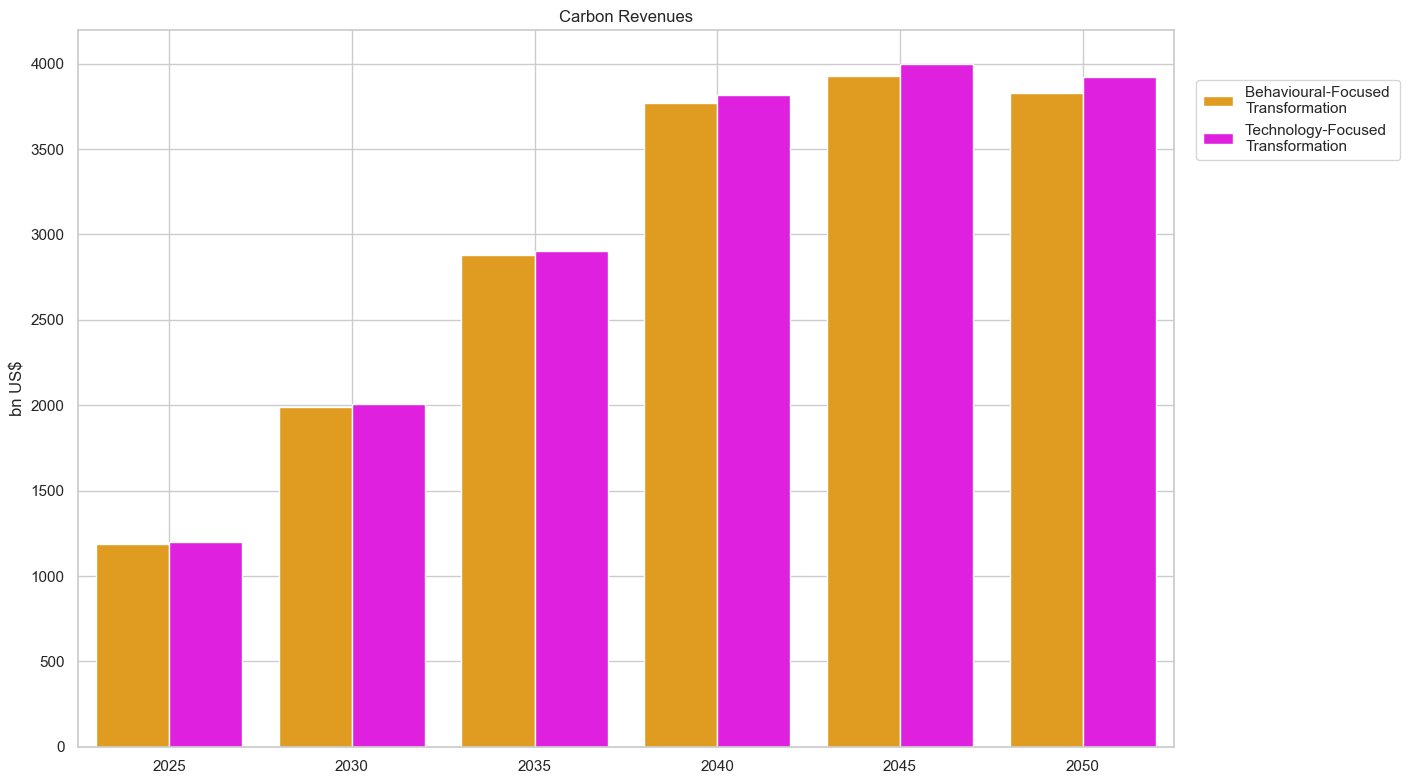

In [43]:
# Import data
carbon_revenue = pd.read_excel(r'X:\user\maycocks\GEO7\additional_figure_data\11.10_28_GEO_Results_for_Vassilis.xlsx')
carbon_revenue.rename(columns={'topic':'model'}, inplace=True)
carbon_revenue = pyam.IamDataFrame(carbon_revenue)
carbon_revenue.rename(scenario=scenario_rename_dict, inplace=True)

fig,ax = plt.subplots(figsize=(12, 8))
# Use Seaborn to create the plot with markers and lines
carbon_revenue_data = carbon_revenue.data
carbon_revenue_data["year"] = carbon_revenue_data["year"].astype(str)
# # Define the color palette for scenarios
scenario_colors = {
    "Current Trends": "black",
    "Behaviour-focused": "orange",
    "Technology-focused": "magenta",
}
# Convert 'scenario' column to a categorical type with the desired order
carbon_revenue_data["scenario"] = pd.Categorical(carbon_revenue_data["scenario"])

sns.barplot(
    data=carbon_revenue_data,
    x="year",
    y="value",
    hue="scenario",
    palette=scenario_colors,
    ax=ax,
    order=sorted(carbon_revenue_data["year"].unique())
)

ax.legend().set_visible(False)
# Set labels and titl
ax.set_xlabel('')
ax.set_ylabel(carbon_revenue_data["unit"].iloc[0])
ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
title = ("Carbon Revenues")
ax.set_title(title)  # Set the title to the variable

# Add Legend manually
handles, labels = ax.get_legend_handles_labels()
rename_variables = {
"Behaviour-focused": "Behavioural-Focused \nTransformation",
"Technology-focused": "Technology-Focused \nTransformation",
}
new_labels = [rename_variables.get(label, label) for label in labels]
fig.legend(handles, new_labels, bbox_to_anchor=(1.18, 0.9))

plt.grid(True)
# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()
variable_name = "11.10_Carbon_Revenue"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

# Reinitialize cause lazy to change at top
carbon_revenue_data = carbon_revenue.timeseries()
carbon_revenue_data = carbon_revenue_data.reset_index()
carbon_revenue_data = carbon_revenue_data.drop(columns=['model','region'])
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
carbon_revenue_data.to_excel(output_file, index=False)



## 11.10
- Global CO2 emissions
- Global GHG emissions (Kyoto)
- Global CH4 emissions
- Global N20 emissions

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13980\1966071263.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marker_data["year"] = marker_data["year"].astype(str)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13980\1966071263.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ar6_data["year"] = ar6_data["year"].astype(str)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_13980\1966071263.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

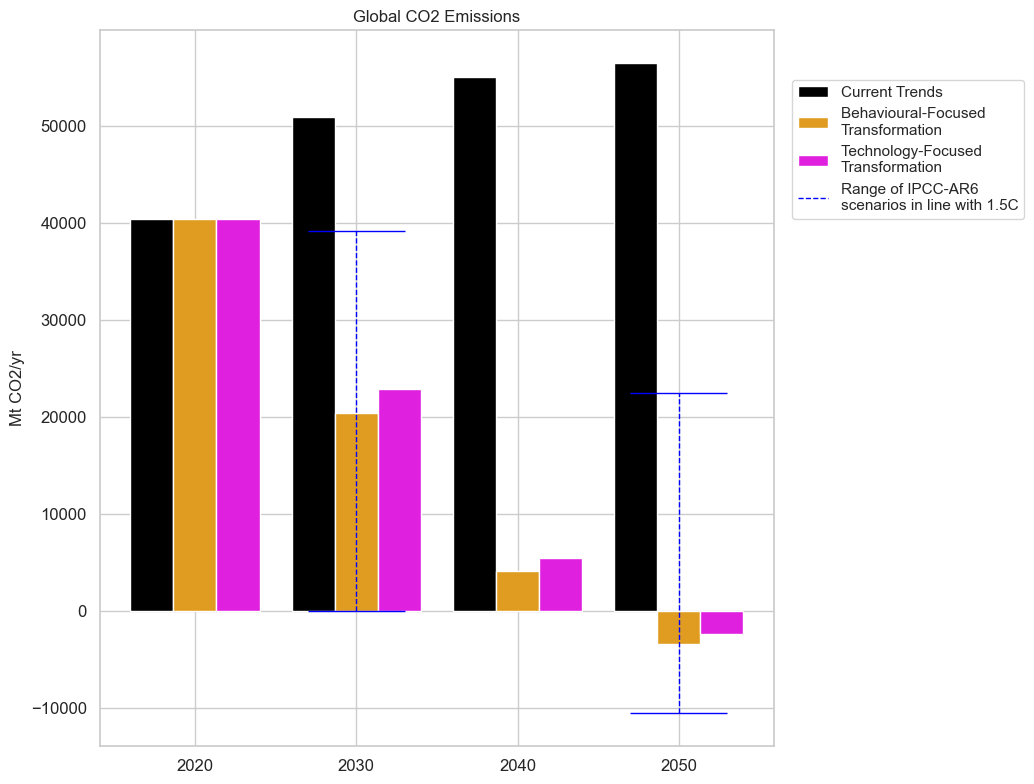

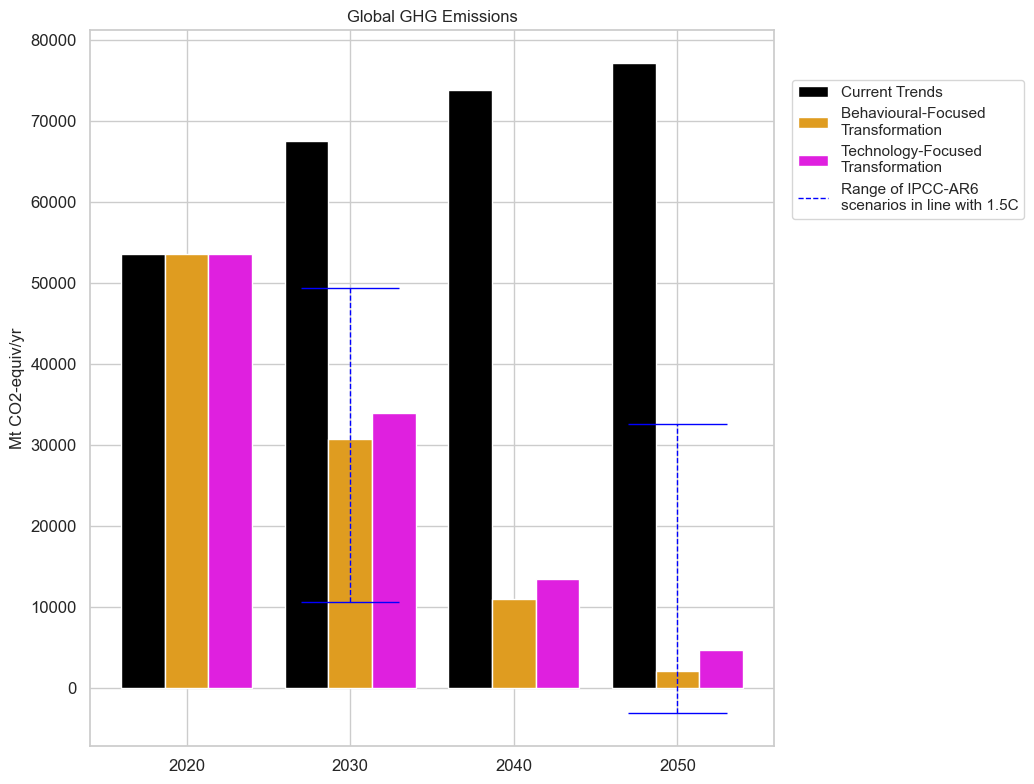

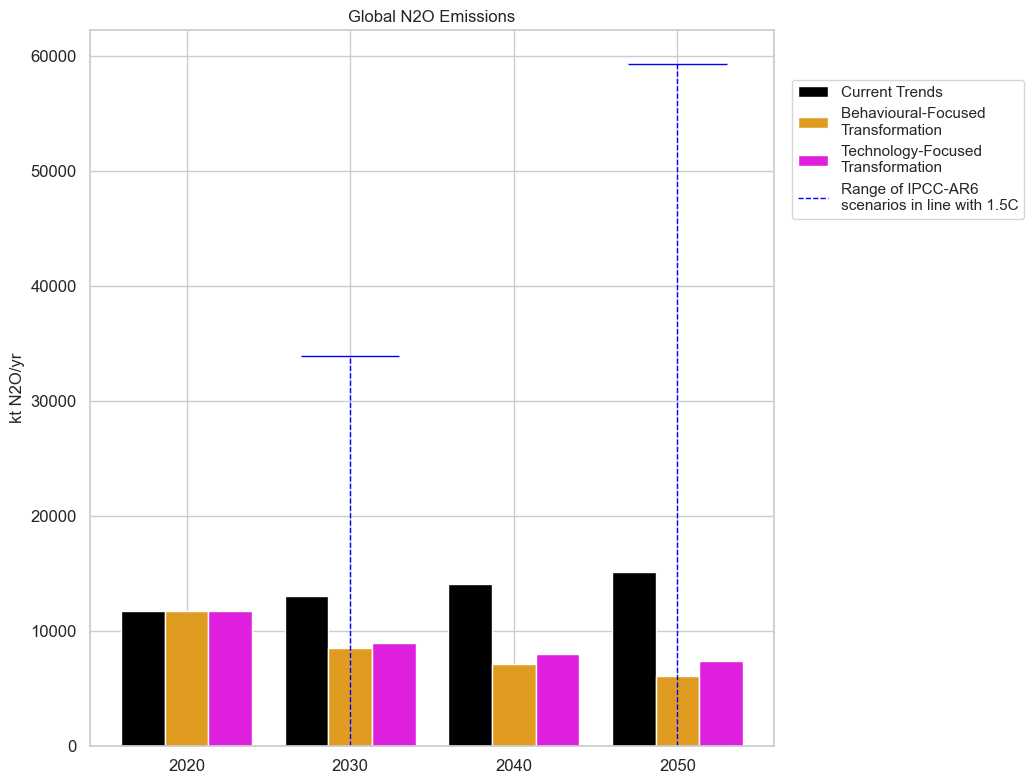

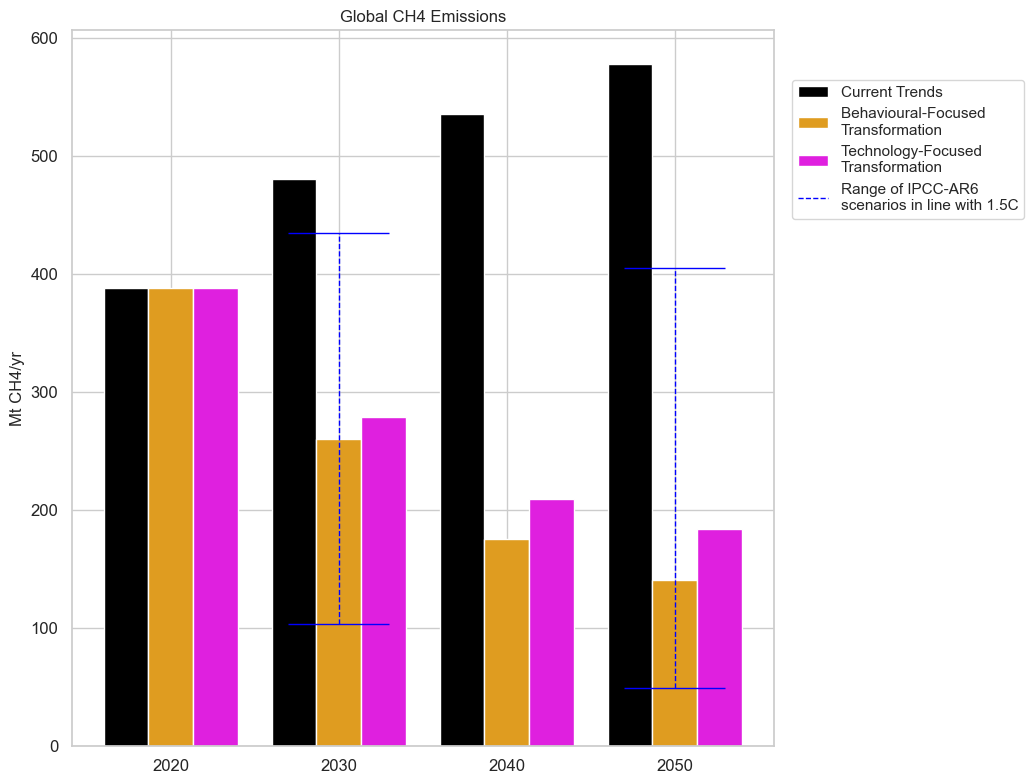

In [27]:
variables = df_marker_data.variable.unique()
# Rerun initializing cells before 11.1 if problems, did not fix variable assignment
report_variables =[
        'Emissions|CO2',
        'Emissions|Kyoto Gases',
        'Emissions|N2O',
        'Emissions|CH4',
        #'Agricultural Production|Non-Energy|Crops',
        #'Agricultural Production|Non-Energy|Livestock',
        #'Food Demand|Crops',
        #'Food Demand|Livestock',
        #'Yield|Cereal'
    ]
# variables = ['Emissions|CO2']
for variable in report_variables:
    # Use Seaborn to create the plot with markers and lines
    marker_data = df_marker_data[df_marker_data["variable"] == variable]
    marker_data["year"] = marker_data["year"].astype(str)

    ar6_data = df_ar6_data[df_ar6_data["variable"] == variable]
    ar6_data["year"] = ar6_data["year"].astype(str)

    # # Define the color palette for scenarios
    scenario_colors = {
        "Current Trends": "black",
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }

    fig, ax = plt.subplots(figsize=(8, 8))
    desired_scenario_order = ["Current Trends"] + [s for s in marker_data["scenario"].unique() if s != "Current Trends"]
    # Convert 'scenario' column to a categorical type with the desired order
    marker_data["scenario"] = pd.Categorical(marker_data["scenario"], categories=desired_scenario_order, ordered=True)

    sns.barplot(
        data=marker_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=ax,
        order=sorted(marker_data["year"].unique())
    )

    cap_width = 0.3
    
    x_positions = {year: idx for idx, year in enumerate(sorted(marker_data["year"].unique()))}
    for year in ar6_data["year"].unique():
        year_data = ar6_data[ar6_data["year"] == year]
        value_min = year_data["value"].min()
        value_max = year_data["value"].max()
        if year in x_positions:  # Only plot for existing bars
            x_pos = x_positions[year]

            ax.vlines(x=x_pos, ymin=value_min, ymax=value_max, color='blue', linestyle='--', lw=1)
            ax.hlines(y=value_min, xmin=x_pos - cap_width, xmax=x_pos + cap_width, color='blue', lw=1)
            ax.hlines(y=value_max, xmin=x_pos - cap_width, xmax=x_pos + cap_width, color='blue', lw=1)
    
    ax.legend().set_visible(False)
    # Set labels and titl
    plt.xlabel('')
    plt.ylabel(marker_data["unit"].iloc[0], fontsize=12)  # Set the y-axis label to the unit
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    title = variable.replace(
        "Emissions|CO2", "Global CO2 Emissions").replace(
        "Emissions|Kyoto Gases", "Global GHG Emissions").replace(
        "Emissions|N2O", "Global N2O Emissions").replace(
        "Emissions|CH4", "Global CH4 Emissions")
    plt.title(title)  # Set the title to the variable
    plt.xticks(rotation=0,
               fontsize=12)
    plt.yticks(fontsize=12)

    # Add Legend manually
    handles, labels = ax.get_legend_handles_labels()
    rename_variables = {
        "Behaviour-focused": "Behavioural-Focused \nTransformation",
        "Technology-focused": "Technology-Focused \nTransformation",
    }
    new_labels = [rename_variables.get(label, label) for label in labels]
    desired_order = ["Current Trends"] + [label for label in new_labels if label != "Current Trends"]
    sorted_handles_labels = sorted(zip(handles, new_labels), key=lambda x: desired_order.index(x[1]))
    sorted_handles, sorted_labels = map(list, zip(*sorted_handles_labels))
    blue_line = Line2D([0], [0], color='blue', lw=1, linestyle='--')
    sorted_handles.append(blue_line)
    sorted_labels.append('Range of IPCC-AR6 \nscenarios in line with 1.5C')
    fig.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.3, 0.9))

    plt.grid(True)
    # Adjust layout to ensure legend fits within the saved image
    plt.tight_layout()
    variable_name = "11.11_" + title
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

    years = sorted(marker_data["year"].unique())
    output_data = []

    # Iterate over each unique scenario
    for scenario in marker_data["scenario"].unique():
        # Initialize a dictionary to hold data for the current scenario
        variable_data = {"variable": scenario, "unit": marker_data["unit"].iloc[0]}
        
        # Initialize IPCC data
        ipcc_min_data = {"variable": "Range of IPCC-AR6 scenarios in line with 1.5C", "unit": marker_data["unit"].iloc[0]}
        ipcc_max_data = {"variable": "Range of IPCC-AR6 scenarios in line with 1.5C", "unit": marker_data["unit"].iloc[0]}
        
        # Iterate over each year
        for year in years:
            # Get the value for the current scenario and year
            marker_value = marker_data.loc[(marker_data["year"] == year) & (marker_data["scenario"] == scenario), "value"]
            
            # Assign the value to the dictionary for the scenario
            variable_data[year] = marker_value.iloc[0] if not marker_value.empty else None
            
            # Get min/max values from the IPCC data (filter by year and scenario)
            if year == "2030" or year == "2050":
                ipcc_values = ar6_data.loc[ar6_data["year"] == year, "value"]
                ipcc_min_data[year] = ipcc_values.min() if not ipcc_values.empty else None
                ipcc_max_data[year] = ipcc_values.max() if not ipcc_values.empty else None

        # Append the current scenario data
        output_data.append(variable_data)

    # Append the IPCC data for min and max
    output_data.append(ipcc_min_data)
    output_data.append(ipcc_max_data)

    # Convert the output data into a DataFrame
    df_output = pd.DataFrame(output_data)

    # Output the result to Excel
    output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
    df_output.to_excel(output_file, index=False)

## 11.12


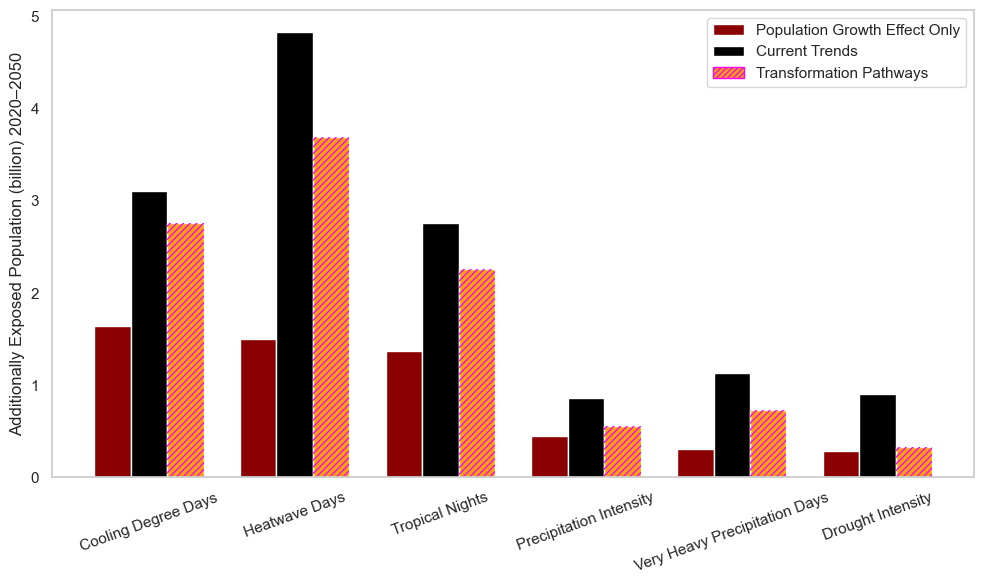

In [4]:
from matplotlib.patches import Patch
rime = pd.read_excel(r'X:\user\maycocks\GEO7\additional_figure_data\11.12_RIME.xlsx')
# Plot bar graph, columns x axis, column 'scenario' as the legend
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
df = rime.copy()
# Define colors for each scenario
colors = {
    'Population Growth Effect Only': 'darkred',
    'Current Trends': 'black',
    'Transformation Pathways': 'orange'  # Assuming magenta/orange thatch is simplified to solid orange
}

bar_width = 0.25
index = range(len(df.columns) - 1)

# Store the legend handles manually
legend_handles = []

for i, scenario in enumerate(df['Scenario']):
    values = df.loc[i, df.columns != 'Scenario']
    x_positions = [p + bar_width * i for p in index]

    if scenario == 'Transformation Pathways':
        # Base bar (orange)
        ax.bar(x_positions, values, bar_width, color='orange')
        # Hatched overlay (magenta stripes)
        ax.bar(x_positions, values, bar_width, color='none', edgecolor='magenta', hatch='/////',linewidth=0)

        # Create hatched patch for legend
        striped_patch = Patch(facecolor='orange', edgecolor='magenta', hatch='//////', label='Transformation Pathways')
        legend_handles.append(striped_patch)

    else:
        bar = ax.bar(x_positions, values, bar_width, color=colors[scenario], label=scenario)
        legend_handles.append(Patch(facecolor=colors[scenario], label=scenario))

# X-axis and labels
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(df.columns[1:], rotation=20, ha='center')
ax.set_ylabel('Additionally Exposed Population (billion) 2020–2050')
ax.grid(False)
# Custom legend
ax.legend(handles=legend_handles)
variable_name = "11.12_exposed_populations_climate_impacts"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")
plt.tight_layout()
plt.show()

## Additional
- CO2 emissions landuse vs energy (CT)
- CO2 emissions landuse vs energy (TF)
- CO2 emissions landuse vs energy (BF)

Current Trends
35948.6161003784
Behavioural-Focused Transformation
-0.36792222079948506
Technology-Focused Transformation
-0.36792222079948506


c:\PBLprogs\miniforge3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")
c:\PBLprogs\miniforge3\lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


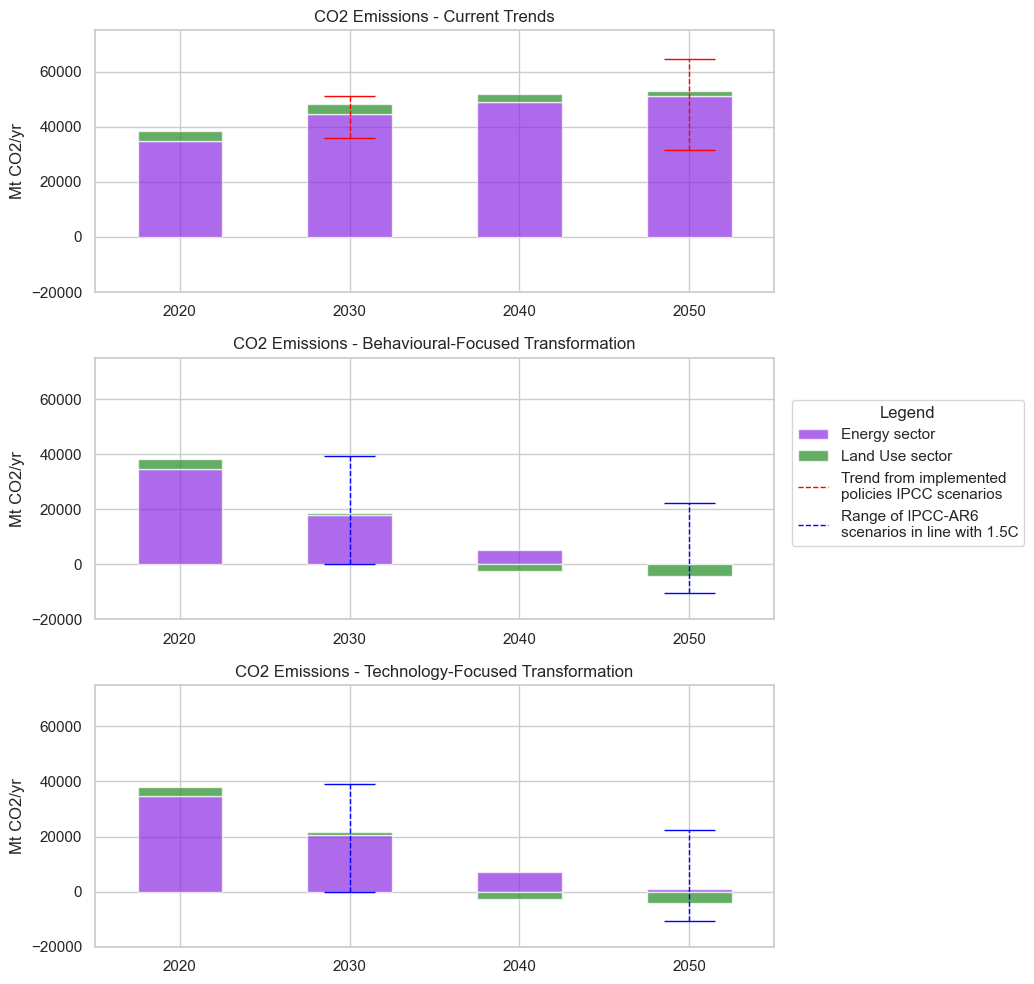

In [34]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["blueviolet","forestgreen"])

# Plotting
fig, axes = plt.subplots(figsize=(8, 10), nrows=3, sharey=True)
variable_name = "11.13_CO2_emissions_land_use_energy_sector"
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}.xlsx"
with pd.ExcelWriter(output_file, mode='w', engine='openpyxl') as writer:
    for idx, scenario in enumerate(["Current Trends", "Behaviour-focused", "Technology-focused"]):
        ax = axes[idx]
        data=df_emissions_co2_geo.filter(variable=['Emissions|CO2|Energy', 'Emissions|CO2|Land Use',],
                                        scenario=scenario)
        
        scenario_colors = {
                "Emissions|CO2|AFOLU": "orange",
                "Emissions|CO2|Energy": "magenta",
            }
        scenario_rename = {
            "Behaviour-focused": "Behavioural-Focused Transformation",
            "Technology-focused": "Technology-Focused Transformation",
            "Current Trends": "Current Trends",
        }

        scenario_name = scenario_rename[scenario]
        print(scenario_name)
        # For some reason it pyam believes there are multiple models in the filtered df
        pyam.IamDataFrame(data.timeseries()).plot.bar(title=f'CO2 Emissions - {scenario_name}',
                        stacked=True,
                        ax=ax, 
                        alpha=0.7, 
                        cmap=cmap)
        
        # Add uncertainty ranges to total
        # Calculate min and max across models for each year
        if scenario == "Current Trends":
            min_values = min_values_c78
            max_values = max_values_c78
            legend_label = 'Trend from implemented \npolicies IPCC scenarios'
            color='red'
        else:
            min_values = min_values_c1_emissions
            max_values = max_values_c1_emissions
            legend_label='Range of IPCC-AR6 \nscenarios in line with 1.5C'
            color='blue'

        cap_width = 0.15
        for year in min_values.index:
            x_positions = {2030: 1, 2050: 3}
            x_position = x_positions[year]
            # for year in min_values.index:
            ax.vlines(x=x_position, ymin=min_values[year], ymax=max_values[year], color=color, linestyle='--', lw=1)
            # Caps
            ax.hlines(y=min_values[year], xmin=x_position - cap_width, xmax=x_position + cap_width, color=color, lw=1)
            ax.hlines(y=max_values[year], xmin=x_position - cap_width, xmax=x_position + cap_width, color=color, lw=1)

        ax.set_ylim(-20000, 75000)
        ax.set(xlabel=None)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.legend().set_visible(False)
        # ax.set_xlim(2010, 2050)
        plt.tight_layout()
        rename_variables = {
        "Emissions|CO2|Energy": "Energy sector",
        "Emissions|CO2|Land Use": "Land Use sector",
        }
        data = data.rename(variable=rename_variables)
        data = data.timeseries()
        data = data.reset_index()
        data = data.drop(columns=['model','scenario','region'])
        print(min_values[2030])
        IPCC_data = pd.DataFrame({
            2030: [min_values[2030], max_values[2030]],
            2050: [min_values[2050], max_values[2050]],
            'unit': 'MtCO2/yr',
            'variable': [f'{legend_label}', f'{legend_label}'],
        })
        
        data = pd.concat([data, IPCC_data], ignore_index=True)
        data.to_excel(writer, sheet_name=scenario_name, index=False)
    
# Manually add Legend
handles, labels = ax.get_legend_handles_labels()

new_labels = [rename_variables.get(label, label) for label in labels]
red_line = Line2D([0], [0], color='red', lw=1, linestyle='--')
handles.append(red_line)
new_labels.append('Trend from implemented \npolicies IPCC scenarios')
blue_line = Line2D([0], [0], color='blue', lw=1, linestyle='--')
handles.append(blue_line)  
new_labels.append('Range of IPCC-AR6 \nscenarios in line with 1.5C')
fig.legend(handles, new_labels, title="Legend", bbox_to_anchor=(1.3, 0.6)) 


plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

        


## 11.13
- PM concentration
- Ozone concentration

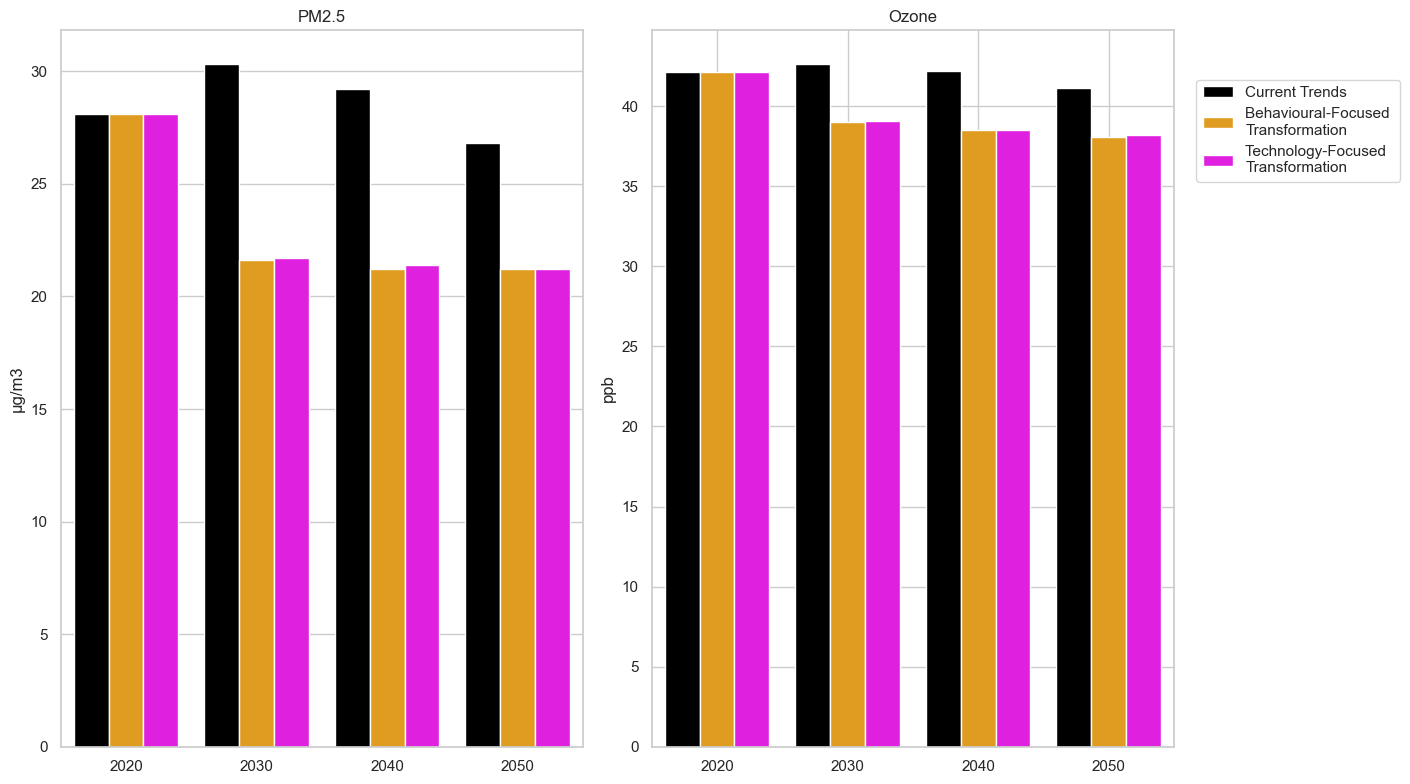

In [52]:
report_variables =[
        'Concentration|PM2.5',
        'Concentration|Ozone'
    ]
fig, axes = plt.subplots(figsize=(12, 8), ncols=2)
for idx, variable in enumerate(report_variables):
    ax = axes[idx]
    # Use Seaborn to create the plot with markers and lines
    FASST_data = df_FASST_image.filter(variable=variable).data
    FASST_data["year"] = FASST_data["year"].astype(str)

    # # Define the color palette for scenarios
    scenario_colors = {
        "Current Trends": "black",
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }
    desired_scenario_order = ["Current Trends"] + [s for s in FASST_data["scenario"].unique() if s != "Current Trends"]
    # Convert 'scenario' column to a categorical type with the desired order
    FASST_data["scenario"] = pd.Categorical(FASST_data["scenario"], categories=desired_scenario_order, ordered=True)

    sns.barplot(
        data=FASST_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=ax,
        order=sorted(FASST_data["year"].unique())
    )

    ax.legend().set_visible(False)
    # Set labels and titl
    ax.set_xlabel('')
    ax.set_ylabel(FASST_data["unit"].iloc[0])
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    title = variable.replace(
        "Concentration|", "")
    ax.set_title(title)  # Set the title to the variable

# Add Legend manually
handles, labels = ax.get_legend_handles_labels()
rename_variables = {
    "Behaviour-focused": "Behavioural-Focused \nTransformation",
    "Technology-focused": "Technology-Focused \nTransformation",
}
new_labels = [rename_variables.get(label, label) for label in labels]
desired_order = ["Current Trends"] + [label for label in new_labels if label != "Current Trends"]
sorted_handles_labels = sorted(zip(handles, new_labels), key=lambda x: desired_order.index(x[1]))
sorted_handles, sorted_labels = map(list, zip(*sorted_handles_labels))
fig.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.18, 0.9))

plt.grid(True)
# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()
variable_name = "11.15_PM2.5_Ozone"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

# Reinitialize cause lazy to change at top
FASST_data = df_FASST_image.data
FASST_data["year"] = FASST_data["year"].astype(str)
years = sorted(FASST_data["year"].unique())
output_data = []
# Iterate over each unique scenario

for scenario in FASST_data["scenario"].unique():
    for variable in report_variables:
        variable_rename = variable.replace("Concentration|", "")
        # Initialize a dictionary to hold data for the current scenario
        variable_data = {"scenario": scenario, "variable": variable_rename, "unit": FASST_data.loc[FASST_data["variable"] == variable, "unit"].iloc[0]}
        # Iterate over each year
        for year in years:
            # Get the value for the current scenario and year
            marker_value = FASST_data.loc[(FASST_data["year"] == year) & (FASST_data["scenario"] == scenario) & (FASST_data["variable"] == variable), "value"]
            # Assign the value to the dictionary for the scenario
            variable_data[year] = marker_value.iloc[0] if not marker_value.empty else None
        # Append the current scenario data
        output_data.append(variable_data)
# Convert the output data into a DataFrame
df_output = pd.DataFrame(output_data)
# Output the result to Excel
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
df_output.to_excel(output_file, index=False)

## 11.15
- Benefits premature deaths PM2.5 
- Benefits premature deaths Ozone

PM2.5              model            scenario region variable       unit  year  \
0  JRC-FASST 1.0.0   Behaviour-focused  WORLD    PM2.5  thousands  2020   
1  JRC-FASST 1.0.0   Behaviour-focused  WORLD    PM2.5  thousands  2030   
2  JRC-FASST 1.0.0   Behaviour-focused  WORLD    PM2.5  thousands  2040   
3  JRC-FASST 1.0.0   Behaviour-focused  WORLD    PM2.5  thousands  2050   
4  JRC-FASST 1.0.0  Technology-focused  WORLD    PM2.5  thousands  2020   
5  JRC-FASST 1.0.0  Technology-focused  WORLD    PM2.5  thousands  2030   
6  JRC-FASST 1.0.0  Technology-focused  WORLD    PM2.5  thousands  2040   
7  JRC-FASST 1.0.0  Technology-focused  WORLD    PM2.5  thousands  2050   

     value  
0  -137.84  
1 -1197.06  
2 -1170.45  
3  -877.82  
4  -137.88  
5 -1177.33  
6 -1135.45  
7  -858.41  
Ozone              model            scenario region variable       unit  year  \
0  JRC-FASST 1.0.0   Behaviour-focused  WORLD    Ozone  thousands  2020   
1  JRC-FASST 1.0.0   Behaviour-focused  WORLD

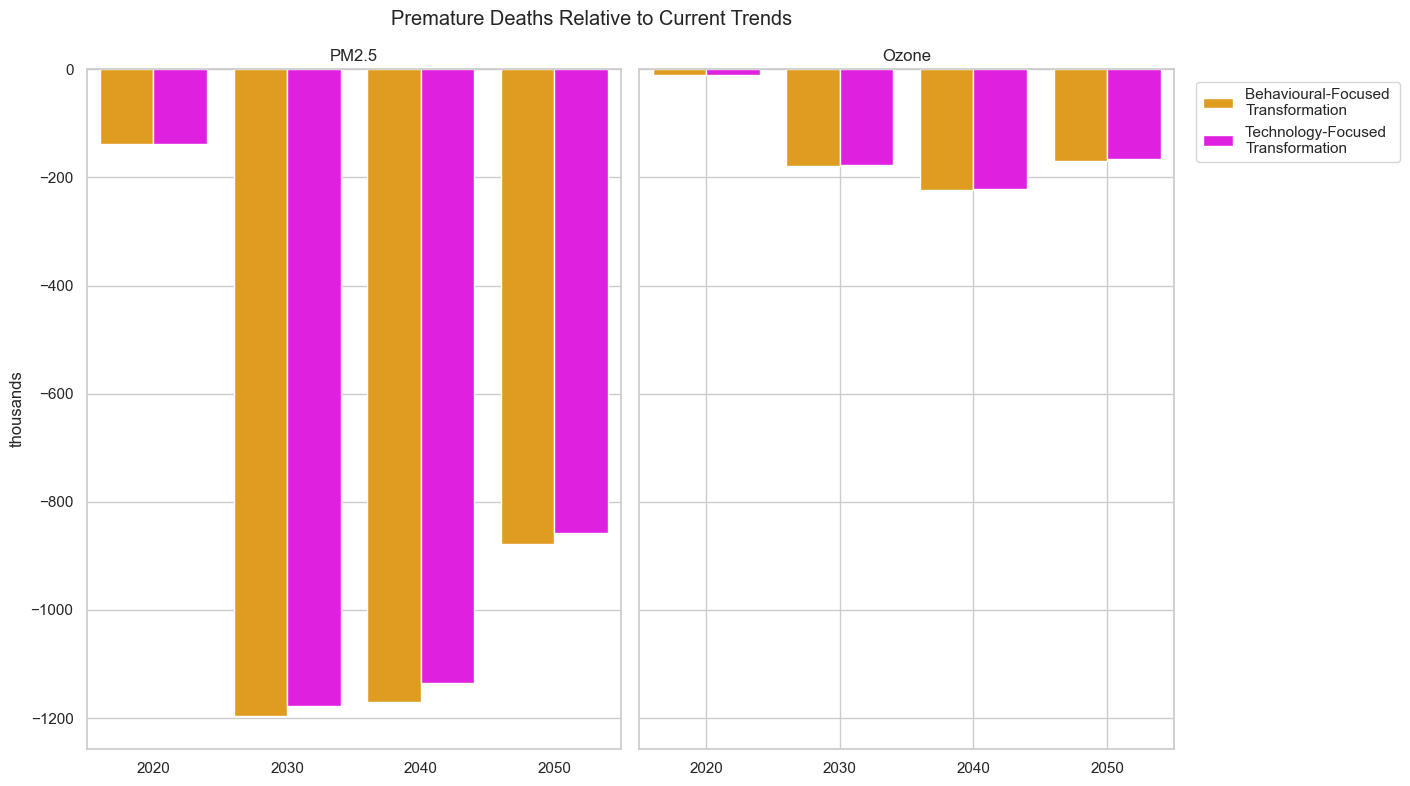

In [9]:
# Import data
mortality = pd.read_csv(r'X:\user\maycocks\GEO7\additional_figure_data\11.17_FASST_MORT23082024.csv')
mortality = pyam.IamDataFrame(mortality)
mortality.rename(scenario=scenario_rename_dict, inplace=True)
mortality.filter(year=[2020,2030,2040,2050],inplace=True)
mortality.filter(scenario=['Behaviour-focused','Technology-focused'],inplace=True)

report_variables =[
        'PM2.5',
        'Ozone'
    ]

fig,axes = plt.subplots(figsize=(12, 8), ncols=2, sharey=True)
for idx, variable in enumerate(report_variables):
    ax = axes[idx]
    # Use Seaborn to create the plot with markers and lines
    mortality_data = mortality.filter(variable=variable).data
    print(f"{variable}",mortality_data)
    mortality_data["year"] = mortality_data["year"].astype(str)
    # # Define the color palette for scenarios
    scenario_colors = {
        "Current Trends": "black",
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }
    sns.barplot(
        data=mortality_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=ax,
        order=sorted(mortality_data["year"].unique()),
        errorbar=None,
    )

    ax.legend().set_visible(False)
    # Set labels and titl
    ax.set_xlabel('')
    ax.set_ylabel(mortality_data["unit"].iloc[0])
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    title = variable
    ax.set_title(title)  # Set the title to the variable

    # Add Legend manually
    handles, labels = ax.get_legend_handles_labels()

rename_variables = {
"Behaviour-focused": "Behavioural-Focused \nTransformation",
"Technology-focused": "Technology-Focused \nTransformation",
}
new_labels = [rename_variables.get(label, label) for label in labels]
fig.legend(handles, new_labels, bbox_to_anchor=(1.18, 0.9))
plt.suptitle("Premature Deaths Relative to Current Trends")
plt.grid(True)
# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()
variable_name = "11.17_mortality_data"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

# Reinitialize cause lazy to change at top
mortality_data = mortality.timeseries()
mortality_data = mortality_data.reset_index()
mortality_data = mortality_data.drop(columns=['model','region'])
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
mortality_data.to_excel(output_file, index=False)

## 11.17
- Carbon stocks


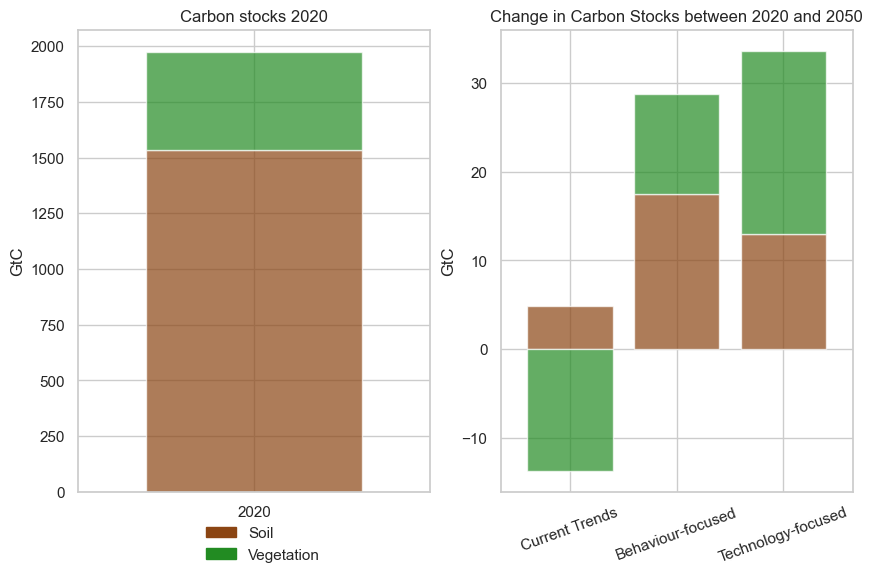

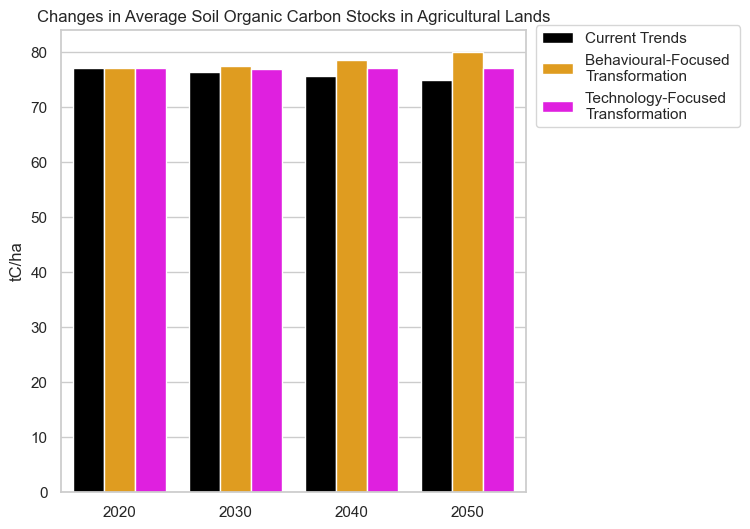

In [70]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["saddlebrown","forestgreen"])
# Carbon stocs in 2020, first figure
# Import data
carbon_stocks = pd.read_excel(r'X:\user\maycocks\GEO7\additional_figure_data\11.18_carbon_stock_figure.xlsx')
carbon_stocks = pyam.IamDataFrame(carbon_stocks)
carbon_stocks.rename(scenario=scenario_rename_dict, inplace=True)
carbon_stocks.filter(year=[2020,2030,2040,2050],inplace=True)
variables_2020 = [
    'Carbon stocks|Soil',
    'Carbon stocks|Vegetation'
]
carbon_stocks_2020 = carbon_stocks.filter(variable=variables_2020, scenario='Current Trends', year=2020)
variables_change = [
    'change|soil',
    'change|vegetation'
]


carbon_stocks_change = carbon_stocks.filter(variable=variables_change,year=2020)

df_pandas = carbon_stocks_change.as_pandas()
scenario_order = ['Current Trends', 'Behaviour-focused', 'Technology-focused']
df_pandas["scenario"] = pd.Categorical(df_pandas["scenario"], categories=scenario_order, ordered=True)
df_pivot = df_pandas.pivot(index="scenario", columns="variable", values="value")

fig, axes = plt.subplots(figsize=(10, 6),ncols=2)

variable_colors = {
        "Carbon stocks|Soil": "saddlebrown",
        "Carbon stocks|Vegetation": "forestgreen",
    }
carbon_stocks_2020.plot.bar(title="Carbon stocks 2020", stacked=True, ax=axes[0], alpha=0.7, width=0.8, cmap=cmap)


df_pivot.plot.bar(title="Change in Carbon Stocks between 2020 and 2050", stacked=True, ax=axes[1], alpha=0.7, width=0.8, cmap=cmap)
axes[0].legend().remove()
axes[1].legend().remove()
axes[0].set_xlabel("")
axes[1].set_xlabel("")
axes[1].set_ylabel("GtC")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=20, ha="center")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0, ha="center")
soil_patch = mpatches.Patch(color="saddlebrown", label="Soil")
vegetation_patch = mpatches.Patch(color="forestgreen", label="Vegetation")

fig.legend(
    handles=[soil_patch, vegetation_patch],
    loc="lower center",
    ncol=1,  # Two items in one row
    bbox_to_anchor=(0.31, -0.03),  # Position below x-axis
    frameon=False
)
variable_name = "11.18_carbon_stocks"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")
plt.show()

# Import SOC data
soc_data = pd.read_excel(r'X:\user\maycocks\GEO7\additional_figure_data\11.18_10.11_SOC_output_LUconst_figureGEO7.xlsx')
soc_data = pyam.IamDataFrame(soc_data)
soc_data.rename(scenario=scenario_rename_dict, inplace=True)
soc_data.filter(year=[2020,2030,2040,2050],inplace=True)


fig,ax = plt.subplots(figsize=(6, 6))

# Use Seaborn to create the plot with markers and lines
soc_data_plot = soc_data.data
soc_data_plot["year"] = soc_data_plot["year"].astype(str)
# Order scenarios
scenario_order = ['Current Trends', 'Behaviour-focused', 'Technology-focused']
soc_data_plot["scenario"] = pd.Categorical(soc_data_plot["scenario"], categories=scenario_order, ordered=True)
# # Define the color palette for scenarios
scenario_colors = {
    "Current Trends": "black",
    "Behaviour-focused": "orange",
    "Technology-focused": "magenta",
}
sns.barplot(
    data=soc_data_plot,
    x="year",
    y="value",
    hue="scenario",
    palette=scenario_colors,
    ax=ax,
    order=sorted(soc_data_plot["year"].unique()),
    errorbar=None,
)

ax.legend().set_visible(False)
# Set labels and titl
ax.set_xlabel('')
ax.set_ylabel(soc_data_plot["unit"].iloc[0])
ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
title = variable
ax.set_title("Changes in Average Soil Organic Carbon Stocks in Agricultural Lands")  # Set the title to the variable

# Add Legend manually
handles, labels = ax.get_legend_handles_labels()

rename_variables = {
"Current Trends": "Current Trends",
"Behaviour-focused": "Behavioural-Focused \nTransformation",
"Technology-focused": "Technology-Focused \nTransformation",
}
new_labels = [rename_variables.get(label, label) for label in labels]
fig.legend(handles, new_labels, bbox_to_anchor=(1.27, 0.9))
variable_name = "11.18_soc_agricultural_lands"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")


## 11.18
- MSA percentage change
- MSA improvement need data?

          model                              scenario region  \
0  Biodiversity  Behavioural-Focused \nTransformation  World   
1  Biodiversity  Behavioural-Focused \nTransformation  World   
2  Biodiversity  Behavioural-Focused \nTransformation  World   
3  Biodiversity   Technology-Focused \nTransformation  World   
4  Biodiversity   Technology-Focused \nTransformation  World   
5  Biodiversity   Technology-Focused \nTransformation  World   

                                            variable unit  year     value  \
0  Terrestrial Biodiversity|MSA Loss|Other Differ...    %  2050 -0.793996   
1  Terrestrial Biodiversity|MSA Loss|Pressure Cli...    %  2050  1.717684   
2  Terrestrial Biodiversity|MSA Loss|Pressure Lu+...    %  2050  1.653096   
3  Terrestrial Biodiversity|MSA Loss|Other Differ...    %  2050 -0.738026   
4  Terrestrial Biodiversity|MSA Loss|Pressure Cli...    %  2050  1.663958   
5  Terrestrial Biodiversity|MSA Loss|Pressure Lu+...    %  2050  1.671422   

           

C:\Users\maycocks\AppData\Local\Temp\3\ipykernel_12172\1142029734.py:78: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_pivot = df_pandas.pivot_table(index="custom_label", columns="variable", values="value", aggfunc="sum")


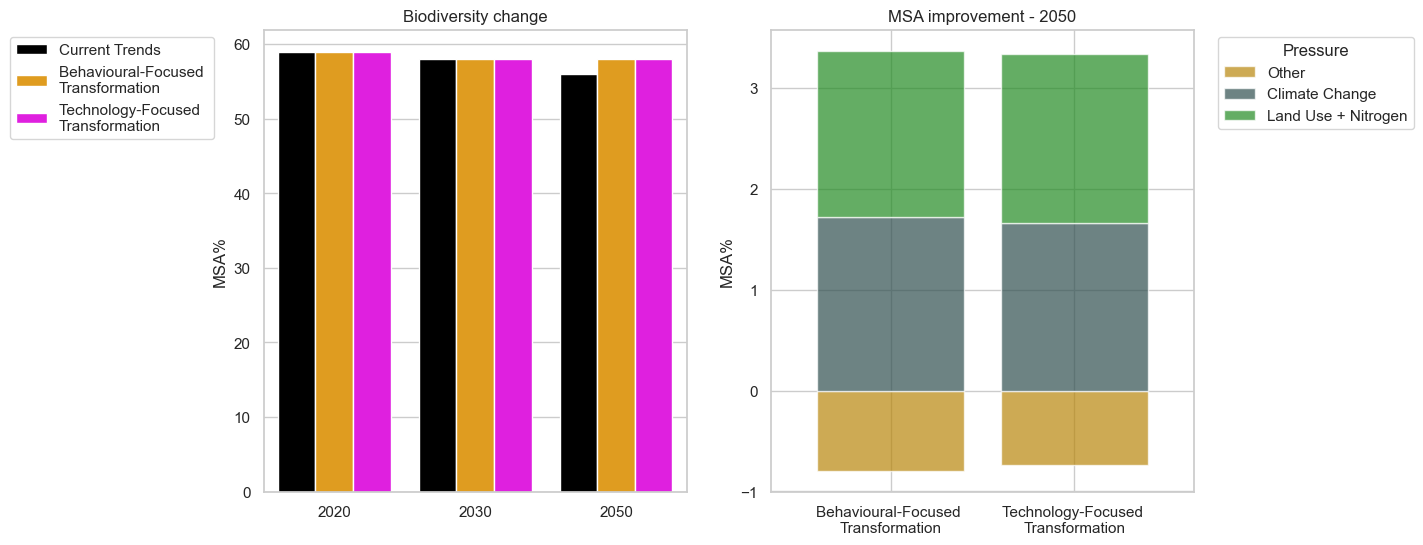

In [41]:
import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["darkgoldenrod","darkslategray","forestgreen"])
var_dict =  {
    'Biodiversity change':[[
        'Terrestrial Biodiversity|MSA'
    ]],
    'MSA improvement':[[
        'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change Difference',
        'Terrestrial Biodiversity|MSA Loss|Pressure Lu+N Difference',
        'Terrestrial Biodiversity|MSA Loss|Other Difference'

    ]],
    }
rename_variables = {
    'Terrestrial Biodiversity|MSA Loss|Pressure Climate Change Difference':'Climate Change',
    'Terrestrial Biodiversity|MSA Loss|Pressure Lu+N Difference':'Land Use + Nitrogen',
    'Terrestrial Biodiversity|MSA Loss|Other Difference':'Other'
}
scenario_colors = {
    "Current Trends": "black",
    "Behaviour-focused": "orange",
    "Technology-focused": "magenta",
}
rename_scenarios = {
        "Behaviour-focused": "Behavioural-Focused \nTransformation",
        "Technology-focused": "Technology-Focused \nTransformation",
        }

fig, axes = plt.subplots(figsize=(12, 6), ncols=2) 
axes = axes.flatten()
for idx, share in enumerate(var_dict.keys()):
    ax = axes[idx]
    variable = var_dict[share][0]
    if share == 'Biodiversity change':
        MSA_data = df_MSA_image.filter(variable=variable).data
        MSA_data["year"] = MSA_data["year"].astype(str)
        desired_scenario_order = ["Current Trends"] + [s for s in MSA_data["scenario"].unique() if s != "Current Trends"]
        # Convert 'scenario' column to a categorical type with the desired order
        MSA_data["scenario"] = pd.Categorical(MSA_data["scenario"], categories=desired_scenario_order, ordered=True)
        sns.barplot(
            data=MSA_data,
            x="year",
            y="value",
            hue="scenario",
            palette=scenario_colors,
            ax=ax,
            order=sorted(MSA_data["year"].unique())
        )
        # Set labels and titl
        ax.set_xlabel('')
        ax.set_ylabel("MSA"+ MSA_data["unit"].iloc[0])
        ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
        ax.set_title("Biodiversity change")  # Set the title to the variable
        # Add Legend manually
        handles, labels = ax.get_legend_handles_labels()
        new_labels = [rename_scenarios.get(label, label) for label in labels]
        desired_order = ["Current Trends"] + [label for label in new_labels if label != "Current Trends"]
        sorted_handles_labels = sorted(zip(handles, new_labels), key=lambda x: desired_order.index(x[1]))
        sorted_handles, sorted_labels = map(list, zip(*sorted_handles_labels))
        ax.legend(sorted_handles, sorted_labels, bbox_to_anchor=(-0.1, 1))
    if share == 'MSA improvement':
        data_combined = df_MSA_image.filter(variable=variable)
        data_combined.rename(scenario=rename_scenarios, inplace=True)
        # Assign labels and ensure correct ordering
        df_pandas["custom_label"] = df_pandas.apply(
            lambda row: "Behavioural-Focused \nTransformation" if (row["scenario"] == "Behavioural-Focused \nTransformation" and row["year"] == 2050)
                else "Technology-Focused \nTransformation" if (row["scenario"] == "Technology-Focused \nTransformation" and row["year"] == 2050)
                else None,
            axis=1
        )

        # Set categorical ordering to ensure correct order
        df_pandas["custom_label"] = pd.Categorical(df_pandas["custom_label"], ordered=True)
        # Sort by categorical order
        df_pandas = df_pandas.sort_values(by="custom_label")
        print(df_pandas)
        # Pivot for plotting
        data_pivot = df_pandas.pivot_table(index="custom_label", columns="variable", values="value", aggfunc="sum")
        print(data_pivot)
        # Plot
        data_pivot.plot.bar(stacked=True, ax=ax, alpha=0.7, width=0.8, cmap=cmap)
        ax.set_xlabel('')
        ax.set_ylabel("MSA"+ MSA_data["unit"].iloc[0])
        ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
        ax.set_title(share+" - 2050")  # Set the title to the variable
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="center")
        handles, labels = ax.get_legend_handles_labels()
        new_labels = [rename_variables.get(label, label) for label in labels]
        ax.legend(handles,new_labels,bbox_to_anchor=(1.04, 1), title="Pressure")

        variable_name = "11.20_" + share
        data_combined = data_combined.rename(variable=rename_variables)
        data_combined = data_combined.timeseries()
        data_combined = data_combined.reset_index()
        data_combined = data_combined.drop(columns=['model','region'])
        output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/11.20_{share}.xlsx"
        data_combined.to_excel(output_file, index=False)
    variable_name = "11.20_MSA"
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
    plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight") 
        
        

## 11.19
- Delivery of nitrogen 
- Delivery of phosphorus

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_928\3643674968.py:65: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_pivot = df_pandas.pivot_table(index="custom_label", columns="variable", values="value", aggfunc="sum")
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_928\3643674968.py:65: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_pivot = df_pandas.pivot_table(index="custom_label", columns="variable", values="value", aggfunc="sum")


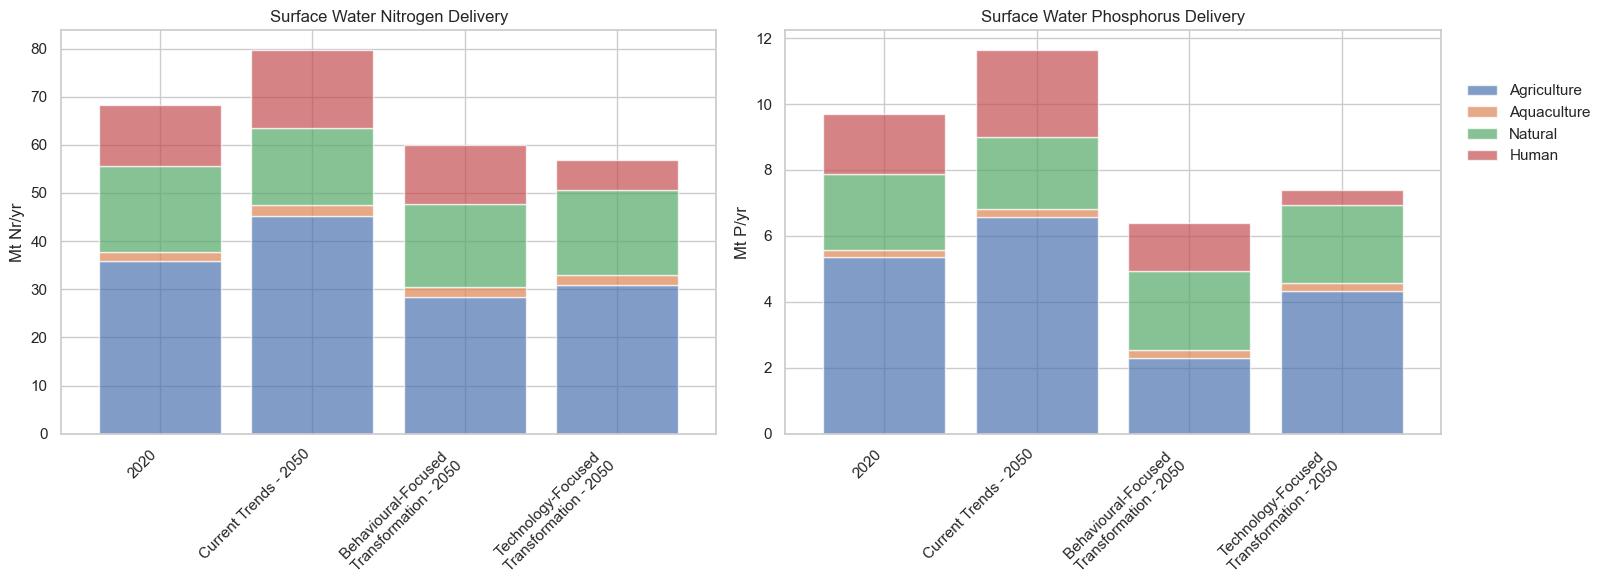

In [36]:
var_dict =  {
    'Surface Water Nitrogen Delivery':[[
        'Water Quality|Nitrogen|Delivery|Agriculture',
        'Water Quality|Nitrogen|Delivery|Aquaculture',
        'Water Quality|Nitrogen|Delivery|Natural',
        'Water Quality|Nitrogen|Delivery|Pointsources',
    ]],
    'Surface Water Phosphorus Delivery':[[
        'Water Quality|Phosphorus|Delivery|Agriculture',
        'Water Quality|Phosphorus|Delivery|Aquaculture',
        'Water Quality|Phosphorus|Delivery|Natural',
        'Water Quality|Phosphorus|Delivery|Pointsources',
    ]]
    }
rename_variables = {
    'Water Quality|Nitrogen|Delivery|Agriculture': 'Agriculture',
    'Water Quality|Nitrogen|Delivery|Aquaculture': 'Aquaculture',
    'Water Quality|Nitrogen|Delivery|Natural': 'Natural',
    'Water Quality|Nitrogen|Delivery|Pointsources': 'Human',
    'Water Quality|Phosphorus|Delivery|Agriculture': 'Agriculture',
    'Water Quality|Phosphorus|Delivery|Aquaculture': 'Aquaculture',
    'Water Quality|Phosphorus|Delivery|Natural': 'Natural',
    'Water Quality|Phosphorus|Delivery|Pointsources': 'Human',
}
rename_scenarios = {
"Current Trends": "Current Trends",
"Behaviour-focused": "Behavioural-Focused Transformation",
"Technology-focused": "Technology-Focused Transformation",
}
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Custom order for labels
custom_order = [
    "2020",
    "Current Trends - 2050",
    "Behavioural-Focused \nTransformation - 2050",
    "Technology-Focused \nTransformation - 2050"
]

for i, (share, ax) in enumerate(zip(var_dict.keys(), axes)):  # Iterate through subplots
    var_list = var_dict[share][0]

    data_2020 = df_water_image.filter(variable=var_list, year=2020, scenario="Current Trends")
    data_2050 = df_water_image.filter(variable=var_list, year=2050)
    data_combined = data_2020.append(data_2050)
    data_combined.rename(scenario=rename_scenarios, inplace=True)
    df_pandas = data_combined.as_pandas()

    # Assign labels and ensure correct ordering
    df_pandas["custom_label"] = df_pandas.apply(
        lambda row: "2020" if (row["year"] == 2020 and row["scenario"] == "Current Trends") 
        else ("Current Trends - 2050" if row["scenario"] == "Current Trends"
              else "Behavioural-Focused \nTransformation - 2050" if row["scenario"] == "Behavioural-Focused Transformation"
              else "Technology-Focused \nTransformation - 2050"),
        axis=1
    )

    # Set categorical ordering to ensure correct order
    df_pandas["custom_label"] = pd.Categorical(df_pandas["custom_label"], categories=custom_order, ordered=True)

    # Sort by categorical order
    df_pandas = df_pandas.sort_values(by="custom_label")

    # Pivot for plotting
    data_pivot = df_pandas.pivot_table(index="custom_label", columns="variable", values="value", aggfunc="sum")

    # Plot
    data_pivot.plot.bar(stacked=True, ax=ax, alpha=0.7, width=0.8)
    
    ax.set_title(share)
    ax.set_xticklabels(data_pivot.index, rotation=45, ha="right")
    ax.set_xlabel(None)
    ax.set_ylabel(f"{data_combined['unit'].iloc[0]}")	
    ax.legend().set_visible(False)
    # Apply the rename mapping to variables - Export two files
    variable_name = share.replace("(", "_").replace(")","").replace(" ", "_")
    variable_name = "11.21_" + variable_name
    data_combined = data_combined.rename(variable=rename_variables)
    data_combined = data_combined.timeseries()
    data_combined = data_combined.reset_index()
    data_combined = data_combined.drop(columns=['model','region'])
    output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
    data_combined.to_excel(output_file, index=False)

# Configure legend for the second plot (anchored to the right)
handles, labels = axes[1].get_legend_handles_labels()
new_labels = [rename_variables.get(label, label) for label in labels]
axes[1].legend(handles, new_labels, bbox_to_anchor=(1.25, 0.9), ncols=1, frameon=False)

plt.tight_layout()
variable_name = "11.21_surface_water_N_P_delivery"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")
plt.show()




## 11.20
- N surface water
- N groundwater
- P surface water

   model                            scenario region         variable  unit  \
1  water                      Current Trends  World  P Surface Water  Mkm2   
2  water                      Current Trends  World  P Surface Water  Mkm2   
0  water  Behavioural-Focused Transformation  World  P Surface Water  Mkm2   
3  water   Technology-Focused Transformation  World  P Surface Water  Mkm2   
1  water                      Current Trends  World  N Surface Water  Mkm2   
2  water                      Current Trends  World  N Surface Water  Mkm2   
0  water  Behavioural-Focused Transformation  World  N Surface Water  Mkm2   
3  water   Technology-Focused Transformation  World  N Surface Water  Mkm2   
1  water                      Current Trends  World   N Ground Water  Mkm2   
2  water                      Current Trends  World   N Ground Water  Mkm2   
0  water  Behavioural-Focused Transformation  World   N Ground Water  Mkm2   
3  water   Technology-Focused Transformation  World   N Ground W

C:\Users\maycocks\AppData\Local\Temp\3\ipykernel_12172\4139747156.py:51: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  data_pivot = combined_df.pivot_table(index="variable", columns="custom_label", values="value", aggfunc="sum")


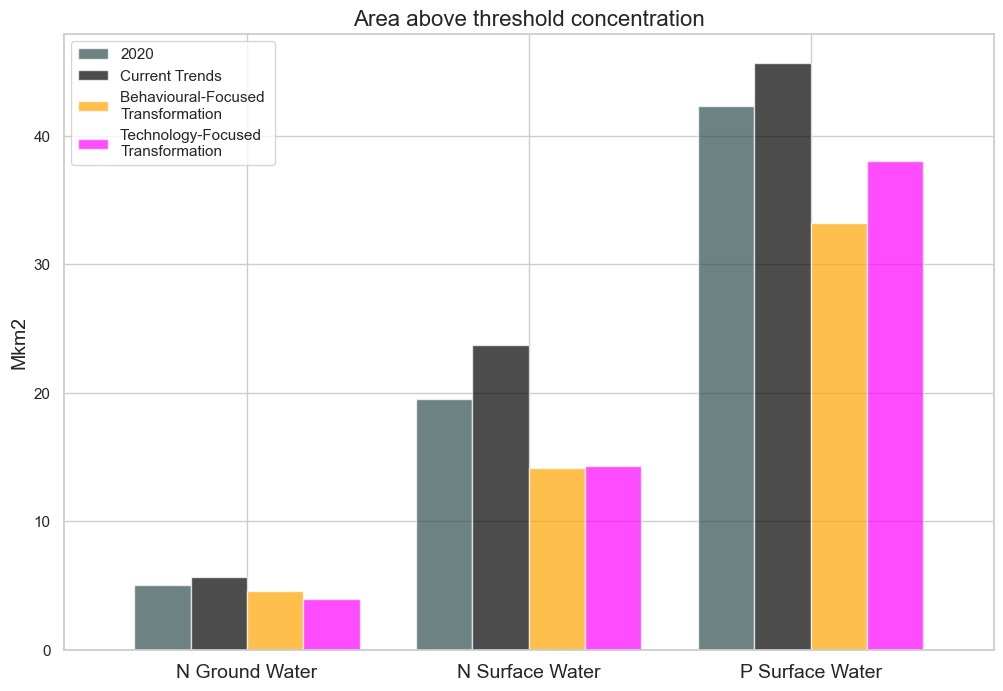

In [87]:
threshold = pd.read_excel(r'X:\user\maycocks\GEO7\additional_figure_data\11.22_thresholds_figures.xlsx')
threshold.rename(columns={'topic':'model'}, inplace=True)
threshold = pyam.IamDataFrame(threshold)
threshold.rename(scenario=scenario_rename_dict, inplace=True)
# Define the custom color map
category_colors = {
    "2020": "black",
    "Current Trends": "black", 
    "Behavioural-Focused \nTransformation": "orange",
    "Technology-Focused \nTransformation": "magenta",
}

report_variables = [
    'P Surface Water',
    'N Surface Water',
    'N Ground Water'
]

# Prepare a list to store data for all variables
combined_data = []

# Loop over each variable in the var_list
for var_list in report_variables:
    # Prepare data for 2020 and 2050
    data_2020 = threshold.filter(variable=var_list, year=2020, scenario="Current Trends")
    data_2050 = threshold.filter(variable=var_list, year=2050)
    
    # Combine the data
    data_combined = data_2020.append(data_2050)
    data_combined.rename(scenario=rename_scenarios, inplace=True)
    
    df_pandas = data_combined.as_pandas()

    # Custom label for scenarios
    df_pandas["custom_label"] = df_pandas.apply(
        lambda row: "2020" if (row["year"] == 2020 and row["scenario"] == "Current Trends") 
        else "Current Trends" if (row["year"] == 2050 and row["scenario"] == "Current Trends") 
        else "Behavioural-Focused \nTransformation" if (row["year"] == 2050 and row["scenario"] == "Behavioural-Focused Transformation") 
        else "Technology-Focused \nTransformation" if (row["year"] == 2050 and row["scenario"] == "Technology-Focused Transformation")
        else None,
        axis=1
    )

    # Set custom order and sort
    df_pandas["custom_label"] = pd.Categorical(df_pandas["custom_label"], categories=custom_order, ordered=True)
    df_pandas = df_pandas.sort_values(by="custom_label")

    # Add the variable to the data
    df_pandas["variable"] = var_list
    combined_data.append(df_pandas)

# Combine all the data into one DataFrame
combined_df = pd.concat(combined_data)
print(combined_df)

# Pivot to structure the data for plotting
data_pivot = combined_df.pivot_table(index="variable", columns="custom_label", values="value", aggfunc="sum")

# Now plot everything in one graph
fig, ax = plt.subplots(figsize=(12, 8))

# Custom order for the x-axis labels
custom_order = [
    "2020",
    "Current Trends",
    "Behavioural-Focused \nTransformation",
    "Technology-Focused \nTransformation"
]

# Plot the data with bars grouped by variable
category_colors = {
    "2020": "darkslategray",
    "Current Trends": "black", 
    "Behavioural-Focused \nTransformation": "orange",
    "Technology-Focused \nTransformation": "magenta",
}

# Create a color list based on the custom labels
color_list = [category_colors.get(c, "gray") for c in data_pivot.index]

# Now we plot the grouped bars with different colors for each category
bars = data_pivot.plot.bar(ax=ax, alpha=0.7, width=0.8)
print(data_pivot.columns)
# Apply the color to the bars
bar_index = 0  # To keep track of the current bar
for label in data_pivot.columns:  # Loop through each custom_label (column)
    color = category_colors.get(label, "gray")  # Default to gray if label isn't in category_colors
    # Find all bars corresponding to this label
    for i in range(len(data_pivot.index)):  # Loop over the variables (x-axis)
        # For each variable, get the bar corresponding to this custom_label
        bar = bars.patches[bar_index]
        bar.set_facecolor(color)  # Set the color for this bar
        bar_index += 1  # Move to the next bar


# Add labels and title
ax.set_title("Area above threshold concentration", fontsize=16)
ax.set_xticklabels(data_pivot.index, rotation=0, ha="center", fontsize=14)
ax.set_xlabel(None)
ax.set_ylabel(f"{data_combined['unit'].iloc[0]}", fontsize=14)
ax.legend().set_visible(True)
data_combined = threshold.timeseries()
data_combined = data_combined.reset_index()
data_combined = data_combined.drop(columns=['model','region'])
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/11.22_N_P_thresholds.xlsx"
data_combined.to_excel(output_file, index=False)

variable_name = "11.22_N_P_thresholds"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")
# Show plot
plt.show()

## 11.22
- Rainfed crop areas No data

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : water (1)
 * scenario : Behaviour-focused, Current Trends, Technology-focused (3)
Timeseries data coordinates:
   region   : World (1)
   variable : Rainfed Cropland, Water Yield Gap>30%, Water Yield Gap>50% (3)
   unit     : Mkm2 (1)
   year     : 2020, 2030, 2040, 2050 (4)


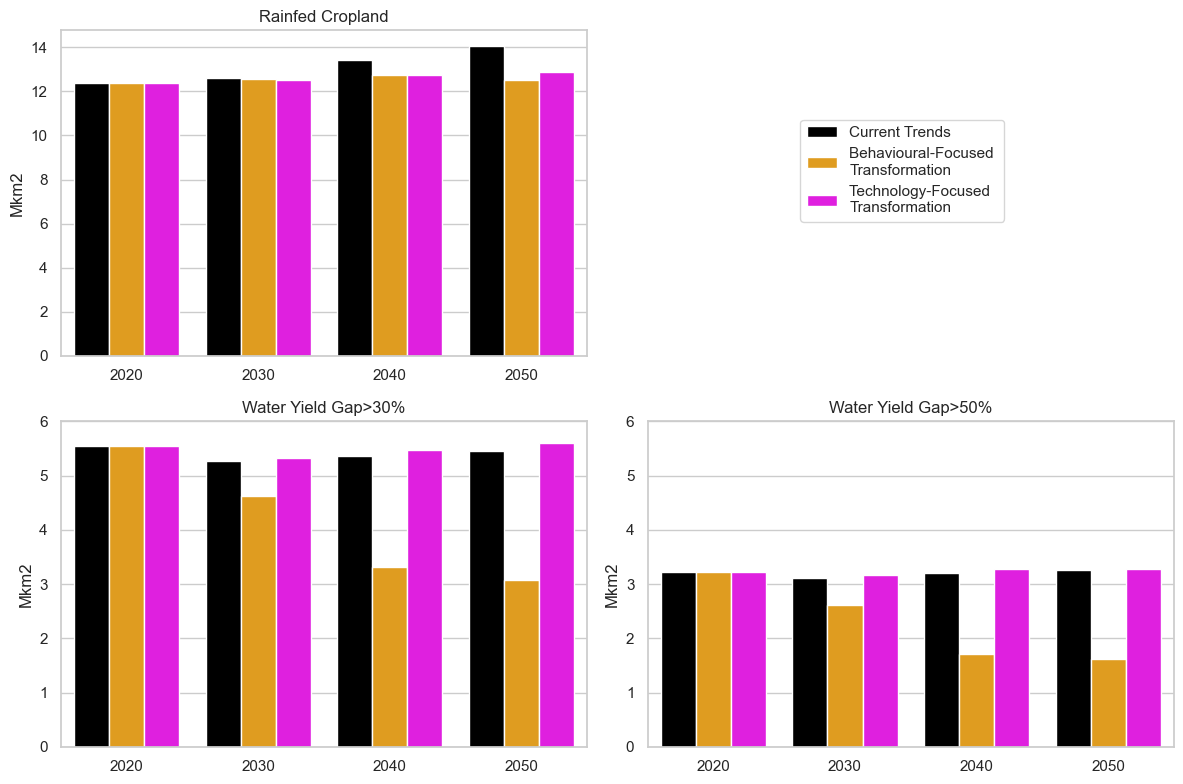

In [104]:
WYG = pd.read_csv(r'X:\user\maycocks\GEO7\additional_figure_data\11.24_WYG_analysis.csv')
WYG.rename(columns={'topic':'model'}, inplace=True)
WYG = pyam.IamDataFrame(WYG)
WYG.rename(scenario=scenario_rename_dict, inplace=True)
WYG.filter(year=[2020,2030,2040,2050], inplace=True)
print(WYG)
# Define the custom color map
category_colors = {
    "Current Trends": "black", 
    "Behavioural-Focused \nTransformation": "orange",
    "Technology-Focused \nTransformation": "magenta",
}
report_variables = [
    'Rainfed Cropland',
    'blank',
    'Water Yield Gap>30%',
    'Water Yield Gap>50%'
]

fig, axes = plt.subplots(figsize=(12, 8),nrows=2, ncols=2)
axes = axes.flatten()
for idx, variable in enumerate(report_variables):
    if idx == 1:
        continue
    ax = axes[idx]
    # Use Seaborn to create the plot with markers and lines
    WYG_data = WYG.filter(variable=variable).data
    WYG_data["year"] = WYG_data["year"].astype(str)

    # # Define the color palette for scenarios
    scenario_colors = {
        "Current Trends": "black",
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }
    desired_scenario_order = ["Current Trends"] + [s for s in WYG_data["scenario"].unique() if s != "Current Trends"]
    # Convert 'scenario' column to a categorical type with the desired order
    WYG_data["scenario"] = pd.Categorical(WYG_data["scenario"], categories=desired_scenario_order, ordered=True)

    sns.barplot(
        data=WYG_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=ax,
        order=sorted(WYG_data["year"].unique())
    )

    ax.legend().set_visible(False)
    # Set labels and titl
    ax.set_xlabel('')
    ax.set_ylabel(WYG_data["unit"].iloc[0])
    if variable == 'Rainfed Cropland':
        ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    else: 
        ax.set_ylim(0, 6)
    title = variable.replace(
        "Concentration|", "")
    ax.set_title(title)  # Set the title to the variable
axes[1].set_visible(False)
# Add Legend manually
handles, labels = ax.get_legend_handles_labels()
rename_variables = {
    "Behaviour-focused": "Behavioural-Focused \nTransformation",
    "Technology-focused": "Technology-Focused \nTransformation",
}
new_labels = [rename_variables.get(label, label) for label in labels]
desired_order = ["Current Trends"] + [label for label in new_labels if label != "Current Trends"]
sorted_handles_labels = sorted(zip(handles, new_labels), key=lambda x: desired_order.index(x[1]))
sorted_handles, sorted_labels = map(list, zip(*sorted_handles_labels))
fig.legend(sorted_handles, sorted_labels, bbox_to_anchor=(0.85, 0.85))

# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()
variable_name = "11.24_WYG_analysis"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

# Reinitialize cause lazy to change at top
WYG_data = WYG.data
WYG_data["year"] = WYG_data["year"].astype(str)
years = sorted(WYG_data["year"].unique())
output_data = []
# Iterate over each unique scenario

for scenario in WYG_data["scenario"].unique():
    report_variables = [
        'Rainfed Cropland',
        'Water Yield Gap>30%',
        'Water Yield Gap>50%'
    ]
    for variable in report_variables:
        variable_rename = variable.replace("Concentration|", "")
        # Initialize a dictionary to hold data for the current scenario
        variable_data = {"scenario": scenario, "variable": variable_rename, "unit": WYG_data.loc[WYG_data["variable"] == variable, "unit"].iloc[0]}
        # Iterate over each year
        for year in years:
            # Get the value for the current scenario and year
            marker_value = WYG_data.loc[(WYG_data["year"] == year) & (WYG_data["scenario"] == scenario) & (WYG_data["variable"] == variable), "value"]
            # Assign the value to the dictionary for the scenario
            variable_data[year] = marker_value.iloc[0] if not marker_value.empty else None
        # Append the current scenario data
        output_data.append(variable_data)
# Convert the output data into a DataFrame
df_output = pd.DataFrame(output_data)
# Output the result to Excel
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
df_output.to_excel(output_file, index=False)

## 11.23
- Undernourished people
- Traditional cookstoves
- Unimproved water access
- poverty USD2.15 (PPP in 2017)
- DALY
- Civil War Onset

              model            scenario region                 variable  \
0   Socio_Economics   Behaviour-focused  World  Population|Malnourished   
1   Socio_Economics   Behaviour-focused  World  Population|Malnourished   
2   Socio_Economics   Behaviour-focused  World  Population|Malnourished   
3   Socio_Economics   Behaviour-focused  World  Population|Malnourished   
4   Socio_Economics      Current Trends  World  Population|Malnourished   
5   Socio_Economics      Current Trends  World  Population|Malnourished   
6   Socio_Economics      Current Trends  World  Population|Malnourished   
7   Socio_Economics      Current Trends  World  Population|Malnourished   
8   Socio_Economics  Technology-focused  World  Population|Malnourished   
9   Socio_Economics  Technology-focused  World  Population|Malnourished   
10  Socio_Economics  Technology-focused  World  Population|Malnourished   
11  Socio_Economics  Technology-focused  World  Population|Malnourished   

       unit  year   valu

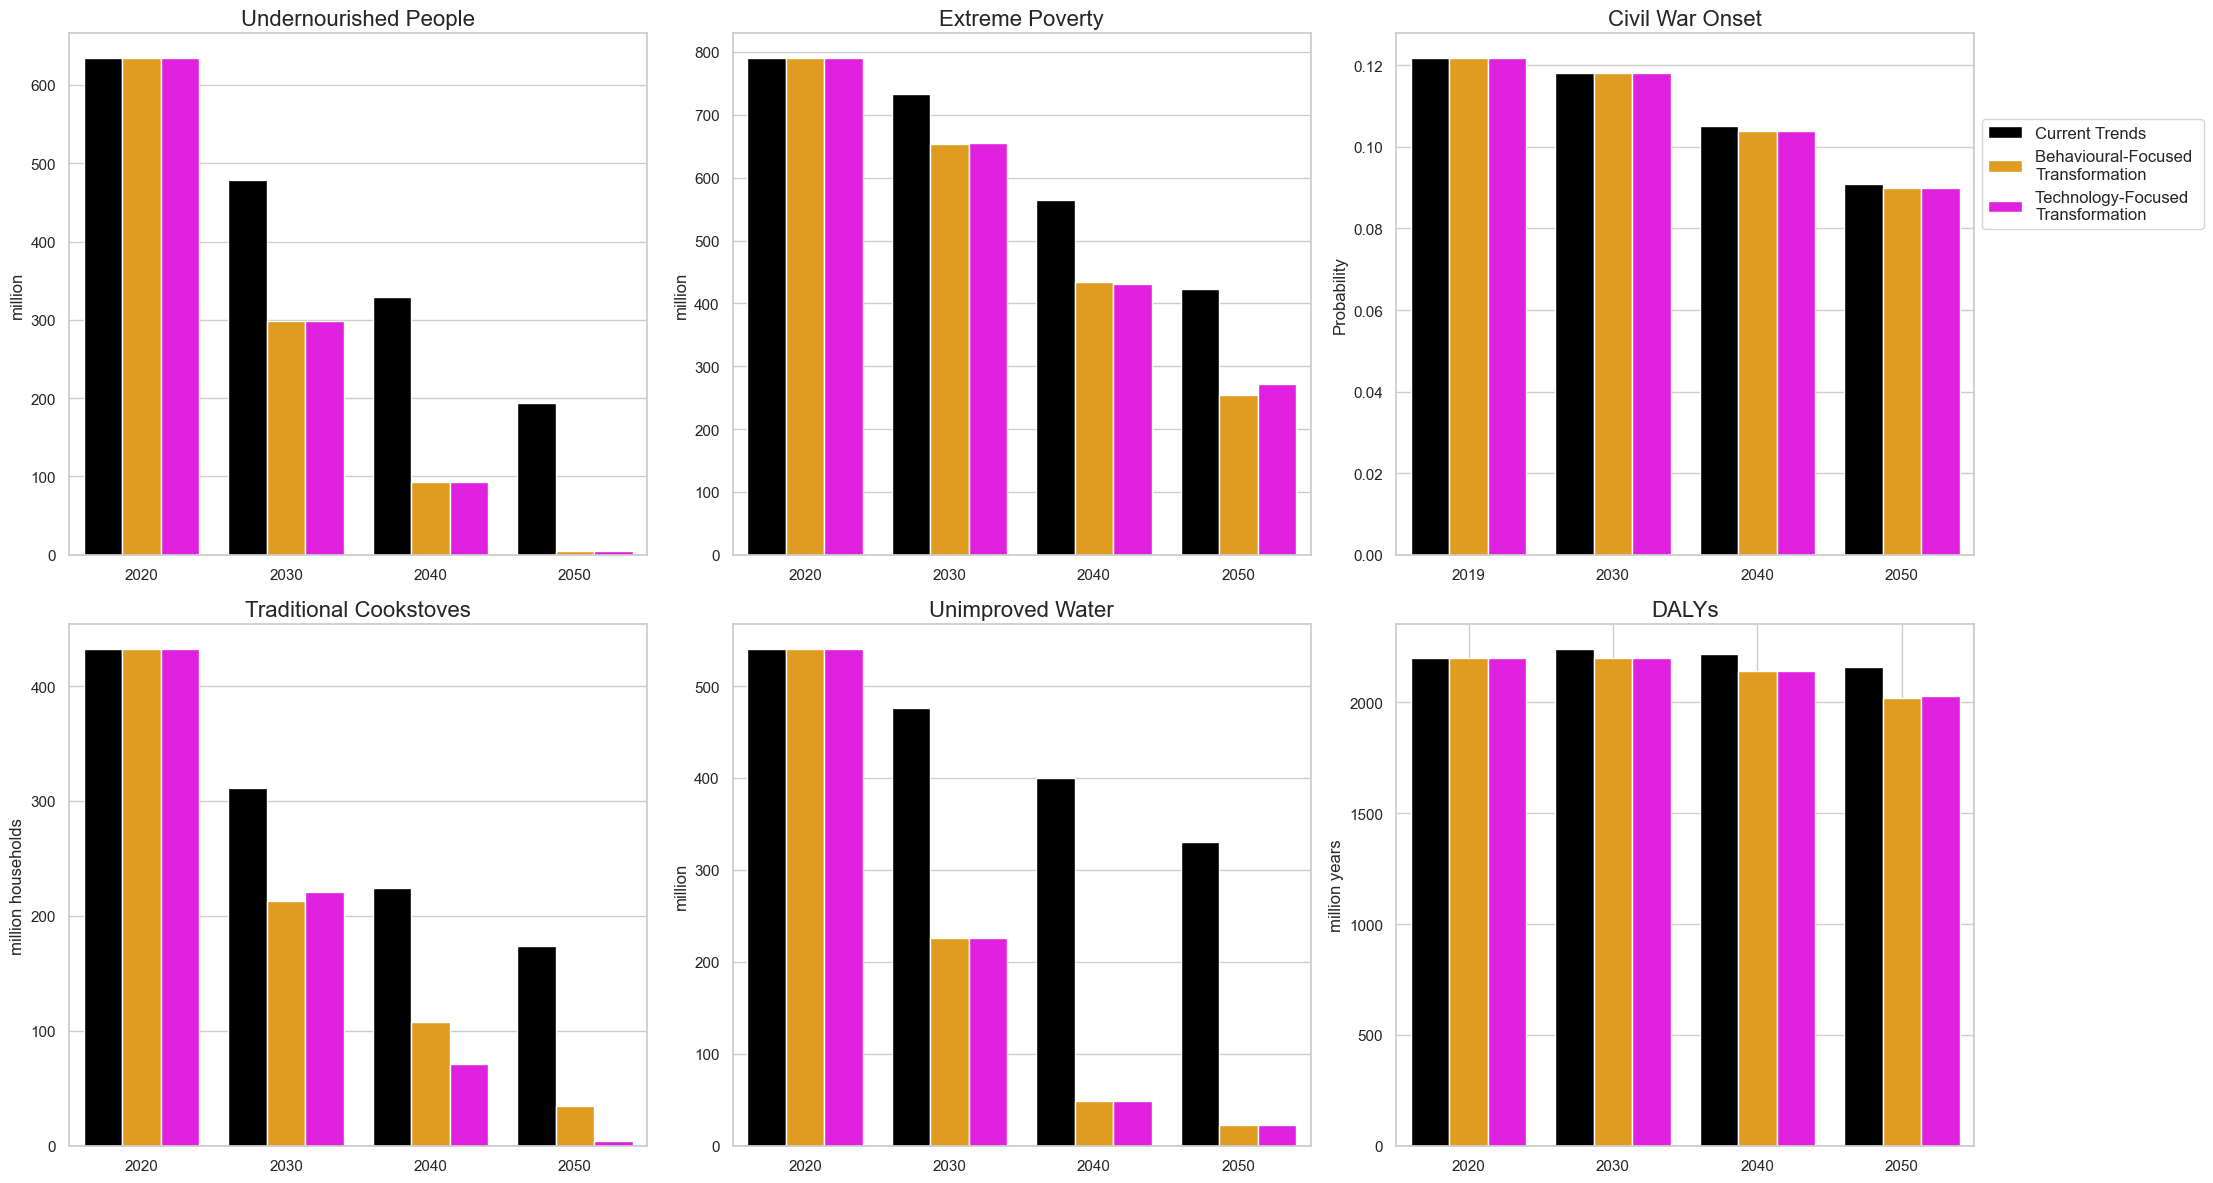

In [25]:
report_variables =  [
        'Population|Malnourished',
        'Population|Poverty Under $2.15',
        'State Failure|Civil War',
        'Traditional Cookstoves',
        'Unimproved Water',
        'DALYs'
    ]
rename_variables = {
    'Population|Malnourished': 'Undernourished People',
    'Population|Poverty Under $2.15': 'Extreme Poverty',
    'State Failure|Civil War': 'Civil War Onset',
    'Traditional Cookstoves': 'Traditional Cookstoves',
    'Unimproved Water': 'Unimproved Water',
    'DALYs': 'DALYs'
}
rename_scenarios = {
"Current Trends": "Current Trends",
"Behaviour-focused": "Behavioural-Focused Transformation",
"Technology-focused": "Technology-Focused Transformation",
}
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
axes = axes.flatten()
for idx, variable in enumerate(report_variables):
    ax = axes[idx]
    # Use Seaborn to create the plot with markers and lines
    IFs_data = df_IFs.filter(variable=variable).data
    IFs_data["year"] = IFs_data["year"].astype(str)
    if variable == 'State Failure|Civil War':
        IFs_data = IFs_data.replace({'year': {'2020': '2019'}})

    # # Define the color palette for scenarios
    scenario_colors = {
        "Current Trends": "black",
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }
    desired_scenario_order = ["Current Trends"] + [s for s in IFs_data["scenario"].unique() if s != "Current Trends"]
    # Convert 'scenario' column to a categorical type with the desired order
    IFs_data["scenario"] = pd.Categorical(IFs_data["scenario"], categories=desired_scenario_order, ordered=True)
    print(IFs_data)
    sns.barplot(
        data=IFs_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=ax,
        order=sorted(IFs_data["year"].unique()),

    )

    ax.legend().set_visible(False)
    # Set labels and titl
    ax.set_xlabel('')
    ax.set_ylabel(IFs_data["unit"].iloc[0])
    ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
    # Map renaming variables
    title = rename_variables[variable]
    ax.set_title(title, fontsize=16)  # Set the title to the variable

# Add Legend manually
handles, labels = ax.get_legend_handles_labels()
rename_scen = {
    "Behaviour-focused": "Behavioural-Focused \nTransformation",
    "Technology-focused": "Technology-Focused \nTransformation",
}
new_labels = [rename_scen.get(label, label) for label in labels]
desired_order = ["Current Trends"] + [label for label in new_labels if label != "Current Trends"]
sorted_handles_labels = sorted(zip(handles, new_labels), key=lambda x: desired_order.index(x[1]))
sorted_handles, sorted_labels = map(list, zip(*sorted_handles_labels))
fig.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1.11, 0.9), fontsize='medium')

plt.grid(True)
# Adjust layout to ensure legend fits within the saved image
plt.tight_layout()
variable_name = f"11.25_global_levels_socioeconomic"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

# Reinitialize cause lazy to change at top
IFs_data = df_IFs.data
IFs_data["year"] = IFs_data["year"].astype(str)
years = sorted(IFs_data["year"].unique())
output_data = []
# Iterate over each unique scenario

for scenario in IFs_data["scenario"].unique():
    for variable in report_variables:
        variable_rename = rename_variables[variable]
        # Initialize a dictionary to hold data for the current scenario
        variable_data = {"scenario": scenario, "variable": variable_rename, "unit": IFs_data.loc[IFs_data["variable"] == variable, "unit"].iloc[0]}
        # Iterate over each year
        for year in years:
            # Get the value for the current scenario and year
            marker_value = IFs_data.loc[(IFs_data["year"] == year) & (IFs_data["scenario"] == scenario) & (IFs_data["variable"] == variable), "value"]
            # Assign the value to the dictionary for the scenario
            variable_data[year] = marker_value.iloc[0] if not marker_value.empty else None
        # Append the current scenario data
        output_data.append(variable_data)
# Convert the output data into a DataFrame
df_output = pd.DataFrame(output_data)
# Output the result to Excel
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
df_output.to_excel(output_file, index=False)

## 11.24
- Avoided deaths

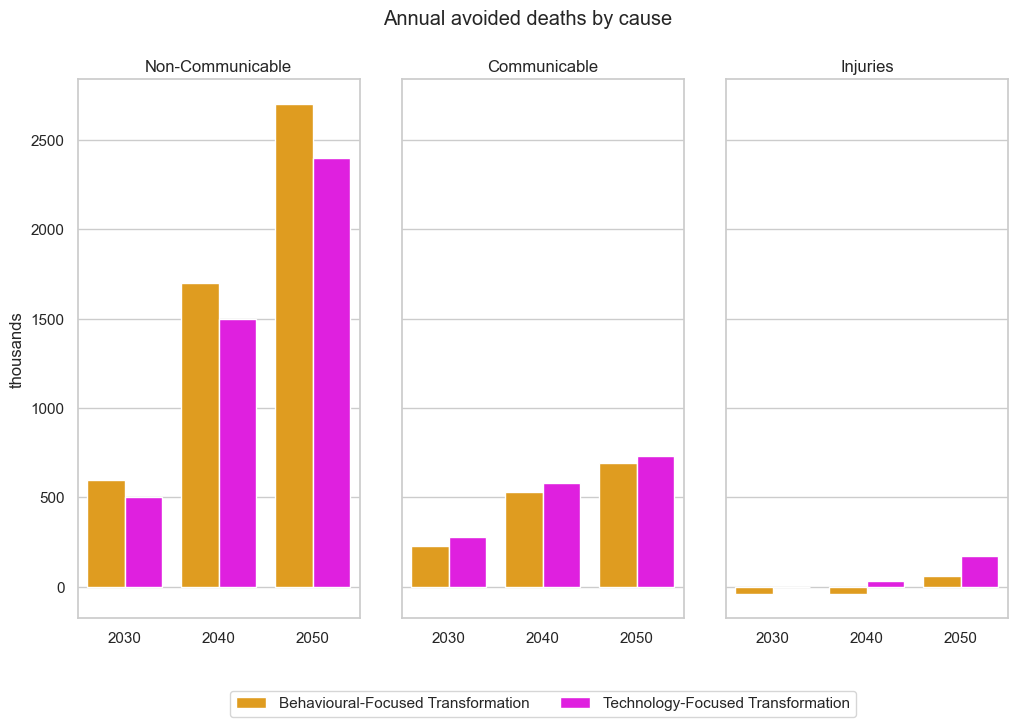

In [12]:
report_variables =  [
    'Health|Deaths|Non-Communicable (Difference Relative to REF)',
    'Health|Deaths|Communicable (Difference Relative to REF)',
    'Health|Deaths|Injuries (Difference Relative to REF)',
         
    ]
rename_variables = {
    "Health|Deaths|Communicable (Difference Relative to REF)": "Communicable",
    "Health|Deaths|Injuries (Difference Relative to REF)": "Injuries",
    "Health|Deaths|Non-Communicable (Difference Relative to REF)": "Non-Communicable",
    
}
rename_scenarios = {
"Behaviour-focused": "Behavioural-Focused Transformation",
"Technology-focused": "Technology-Focused Transformation",
}
fig, axes = plt.subplots(nrows=1, ncols=len(report_variables), figsize=(12,7),sharey=True)

# Loop through each variable and plot
for i, var in enumerate(report_variables):
    # Filter the data for the current variable
    IFs_data = df_IFs.filter(variable=var, year=[2030,2040,2050]).data
    
    # Convert 'year' to string type
    IFs_data["year"] = IFs_data["year"].astype(str)
    IFs_data["value"] = IFs_data["value"]*-1
    # Define the desired order for scenarios (optional, to keep them sorted)
    desired_scenario_order = [s for s in IFs_data["scenario"].unique()]
    # Convert 'scenario' to a categorical type with the desired order
    IFs_data["scenario"] = pd.Categorical(IFs_data["scenario"], categories=desired_scenario_order, ordered=True)
    scenario_colors = {
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
    }
    # Plotting
    sns.barplot(
        data=IFs_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=axes[i],  # Use the ith axis for each subplot
        order=sorted(IFs_data["year"].unique())  # Ensure years are sorted on x-axis
    )
    
    # Set titles for each subplot
    axes[i].set_title(rename_variables[var])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('thousands')
    axes[i].legend().set_visible(False)
    if i == 1:
        handles, labels = axes[i].get_legend_handles_labels()
        new_labels = [rename_scenarios[label] for label in labels]
        axes[i].legend(handles,new_labels,bbox_to_anchor=(0.5, -0.12),loc='upper center',ncol=2)

# Adjust layout for better spacing
fig.suptitle("Annual avoided deaths by cause")
variable_name = "11.26_avoided_deaths"
IFs_data = df_IFs.filter(variable=report_variables, year=[2030,2040,2050])
data_combined = IFs_data.timeseries()
data_combined = data_combined.reset_index()
data_combined['variable'] = data_combined['variable'].map(rename_variables)
data_combined = data_combined.drop(columns=['model','region'])
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}.xlsx"
data_combined.to_excel(output_file, index=False)
plt.subplots_adjust(wspace=0.15)
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")
plt.show()
    






## 11.25
- woman in excess of men living in extreme poverty

              model            scenario          region  \
0   Socio_Economics   Behaviour-focused  Africa (UN-R5)   
1   Socio_Economics   Behaviour-focused  Africa (UN-R5)   
2   Socio_Economics   Behaviour-focused  Africa (UN-R5)   
3   Socio_Economics   Behaviour-focused  Africa (UN-R5)   
4   Socio_Economics      Current Trends  Africa (UN-R5)   
5   Socio_Economics      Current Trends  Africa (UN-R5)   
6   Socio_Economics      Current Trends  Africa (UN-R5)   
7   Socio_Economics      Current Trends  Africa (UN-R5)   
8   Socio_Economics  Technology-focused  Africa (UN-R5)   
9   Socio_Economics  Technology-focused  Africa (UN-R5)   
10  Socio_Economics  Technology-focused  Africa (UN-R5)   
11  Socio_Economics  Technology-focused  Africa (UN-R5)   

                    variable      unit  year  value  
0   Women Excess Men Poverty  millions  2020   30.7  
1   Women Excess Men Poverty  millions  2030   33.3  
2   Women Excess Men Poverty  millions  2040   25.6  
3   Women Excess

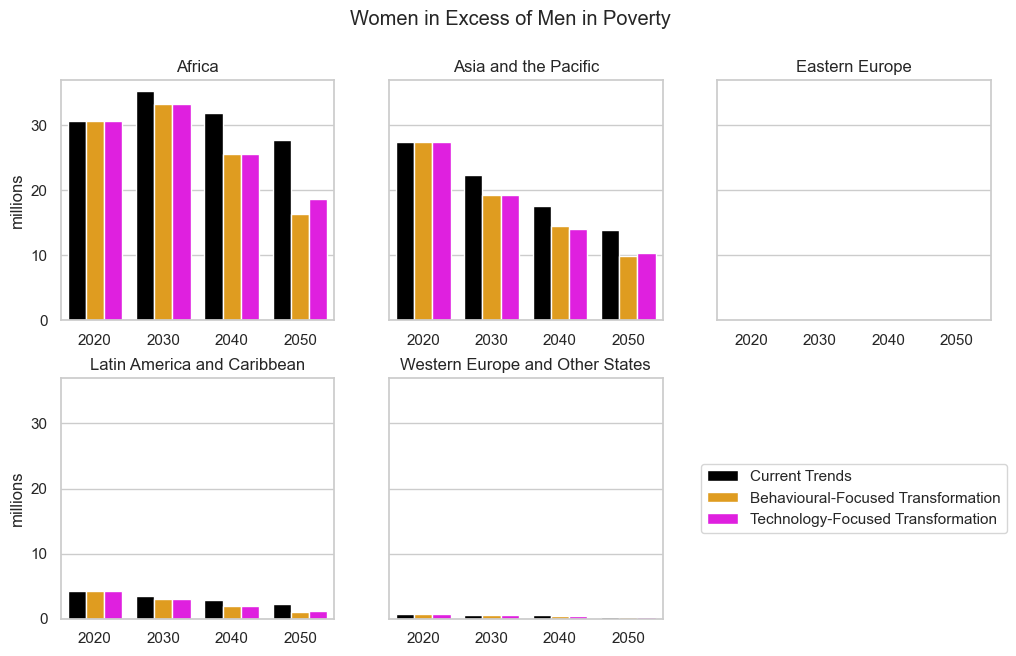

In [31]:
report_variables =  [
    'Woman Excess Men Poverty',
         
    ]
rename_variables = {
    "Woman Excess Men Poverty": "Woman Excess Men Poverty",
    
}
rename_scenarios = {
"Behaviour-focused": "Behavioural-Focused Transformation",
"Technology-focused": "Technology-Focused Transformation",
"Current Trends": "Current Trends",
}
rename_regions = {
    'Africa (UN-R5)': 'Africa',
    'Asia and the Pacific (UN-R5)': 'Asia and the Pacific',
    'Eastern Europe (UN-R5)': 'Eastern Europe',
    'Latin America and Caribbean (UN-R5)': 'Latin America and Caribbean',
    'Western Europe and Other States (UN-R5)': 'Western Europe and Other States'
}
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,7),sharey=True)
axes = axes.flatten()
# Loop through each variable and plot
for i, region in enumerate(df_IFs_woman.region):
    # Filter the data for the current variable
    IFs_data = df_IFs_woman.filter(region=region).data
    # Convert 'year' to string type
    IFs_data["year"] = IFs_data["year"].astype(str)
    # Define the desired order for scenarios (optional, to keep them sorted)
    desired_scenario_order = ["Current Trends"] + ["Behaviour-focused"] + ["Technology-focused"]
    # Convert 'scenario' to a categorical type with the desired order
    IFs_data["scenario"] = pd.Categorical(IFs_data["scenario"], categories=desired_scenario_order, ordered=True)
    scenario_colors = {
        "Behaviour-focused": "orange",
        "Technology-focused": "magenta",
        "Current Trends": "black",   
    }
    print(IFs_data)
    # Plotting
    sns.barplot(
        data=IFs_data,
        x="year",
        y="value",
        hue="scenario",
        palette=scenario_colors,
        ax=axes[i],  # Use the ith axis for each subplot
        order=sorted(IFs_data["year"].unique())  # Ensure years are sorted on x-axis
    )
    
    # Set titles for each subplot
    axes[i].set_title(rename_regions[region])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel('millions')
    axes[i].legend().set_visible(False)

# Hide the last axis (subplot)
axes[-1].axis('off')  # Hide the last subplot

# Move the legend to the last subplot
handles, labels = axes[1].get_legend_handles_labels()  # Reuse the legend from subplot 1
new_labels = [rename_scenarios[label] for label in labels]
axes[-1].legend(handles, new_labels, bbox_to_anchor=(0.5, 0.5), loc='center', ncol=1)
# Adjust layout for better spacing
fig.suptitle("Women in Excess of Men in Poverty")
variable_name = "11.27_woman_poverty"
data_combined = df_IFs_woman.timeseries()
data_combined = data_combined.reset_index()
data_combined = data_combined.drop(columns=['model'])
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}.xlsx"
data_combined.to_excel(output_file, index=False)
plt.subplots_adjust(hspace=0.24)
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")
plt.show()

## Additional 1
- Impact on employment

            model            scenario region          variable  \
0   socioeconomic   Behaviour-focused  World       Agriculture   
1   socioeconomic   Behaviour-focused  World        Commercial   
2   socioeconomic   Behaviour-focused  World            Energy   
3   socioeconomic   Behaviour-focused  World          Industry   
4   socioeconomic   Behaviour-focused  World  Public Transport   
5   socioeconomic      Current Trends  World       Agriculture   
6   socioeconomic      Current Trends  World        Commercial   
7   socioeconomic      Current Trends  World            Energy   
8   socioeconomic      Current Trends  World          Industry   
9   socioeconomic      Current Trends  World  Public Transport   
10  socioeconomic  Technology-focused  World       Agriculture   
11  socioeconomic  Technology-focused  World        Commercial   
12  socioeconomic  Technology-focused  World            Energy   
13  socioeconomic  Technology-focused  World          Industry   
14  socioe

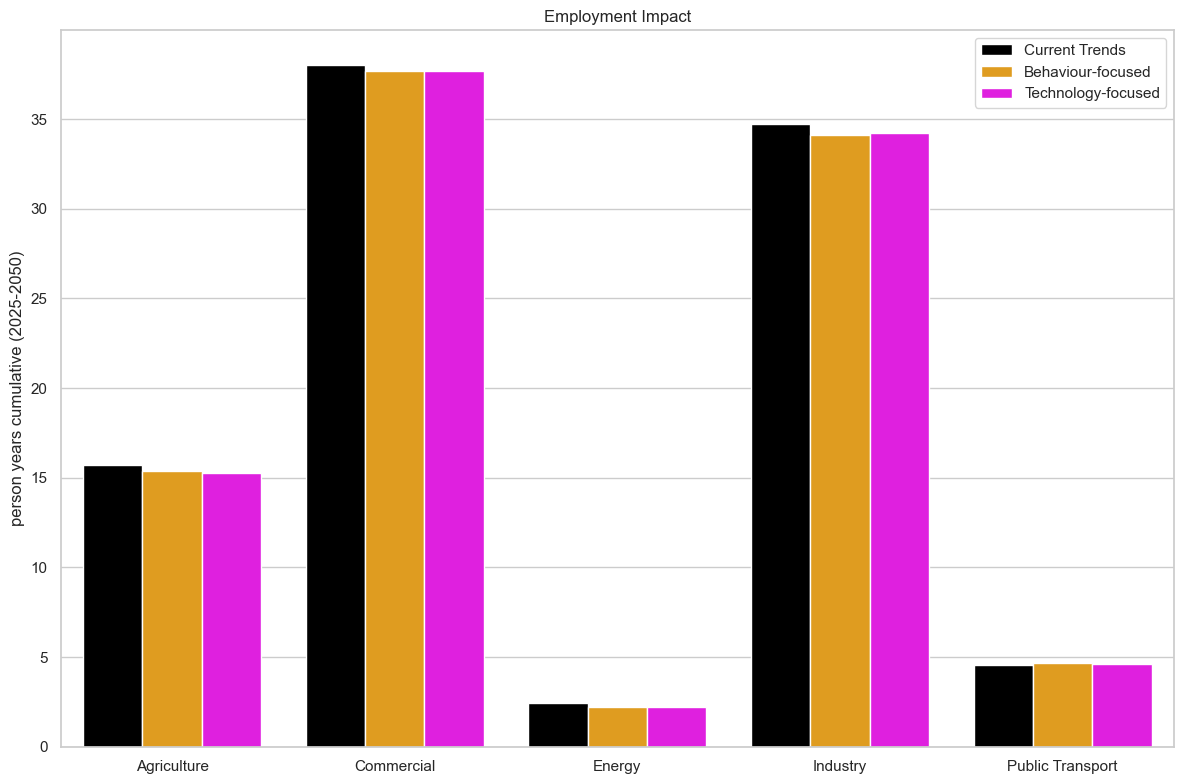

In [47]:
employment = pd.read_excel(r'X:\user\maycocks\GEO7\additional_figure_data\11.10_28_GEO_Results_for_Vassilis.xlsx', sheet_name='11_28')
employment.rename(columns={'topic':'model'}, inplace=True)
employment = pyam.IamDataFrame(employment)
employment.rename(scenario=scenario_rename_dict, inplace=True)

fig,ax = plt.subplots(figsize=(12, 8))
# Use Seaborn to create the plot with markers and lines
employment_data = employment.data
# # Define the color palette for scenarios
scenario_colors = {
    "Current Trends": "black",
    "Behaviour-focused": "orange",
    "Technology-focused": "magenta",
}
desired_scenario_order = ["Current Trends"] + [s for s in employment_data["scenario"].unique() if s != "Current Trends"]
# Convert 'scenario' column to a categorical type with the desired order
employment_data["scenario"] = pd.Categorical(employment_data["scenario"], categories=desired_scenario_order, ordered=True)
print(employment_data)
sns.barplot(
    data=employment_data,
    x="variable",
    y="value",
    hue="scenario",
    palette=scenario_colors,
    ax=ax,
    order=sorted(employment_data["variable"].unique())
)

ax.legend().set_visible(True)
# Set labels and titl
ax.set_xlabel('')
ax.set_ylabel(employment_data["unit"].iloc[0])
ax.set_ylim(min(0,ax.get_ylim()[0]), ax.get_ylim()[1])
ax.set_title("Employment Impact")  

plt.tight_layout()
variable_name = "11.28_Employment_Impact"
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.png", bbox_inches="tight")
plt.savefig(f"../../../plots/TOD/final_figures/chpt_11/{variable_name}.svg", bbox_inches="tight")

# Reinitialize cause lazy to change at top
employment_data = employment.timeseries()
employment_data = employment_data.reset_index()
employment_data = employment_data.drop(columns=['model','region'])
output_file = f"../../../plots/TOD/final_figures/chpt_11/data_for_figures/{variable_name}_data.xlsx"
employment_data.to_excel(output_file, index=False)